Elijah McCauley, Traffic Simulator

In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [3]:
vmax = 5
density = 0.1
road_length = 300

In [4]:
class TrafficSim:
  def __init__(self, vmax, road_length, density):
    self.vmax = vmax
    self.road_length = road_length
    self.num_cars = int(road_length*density)
    self.positions = np.zeros(road_length, dtype=int)
    self.velocities = np.zeros(road_length, dtype=int)
  def initialize(self):
    car_indices = np.zeros(self.num_cars, dtype=int)
    car_indices = random.sample(range(1, self.road_length), self.num_cars)
    for i in car_indices:
      self.positions[i] = 1
      self.velocities[i] = random.randint(0, self.vmax)
  def update(self):
    temp_positions = np.zeros(road_length, dtype=int)
    temp_velocities = np.zeros(road_length, dtype=int)
    i = 0
    while i < self.road_length:
      if self.positions[i] == 1:

        vi = self.velocities[i]

        for j in range(self.vmax):
          if self.positions[(i + j + 1) % self.road_length] == 1:
            d = j
            break
          d = 1000
        #accelerate
        vi = min(vi + 1, self.vmax)
        #decelerate
        if vi > d:
          vi = d


        temp_positions[(i + vi) % self.road_length] = 1

        temp_velocities[(i + vi) % self.road_length] = vi

        i = i + vi + 1
      else:
        i += 1
    self.positions = temp_positions
    self.velocities = temp_velocities

  def display(self):
    road_display = ''
    for i in range(self.road_length):
      if self.positions[i] == 1:
        road_display += str(self.velocities[i])
      else:
        road_display += '-'
    print(road_display)
  def setcars(self, position, velocity):
    for i in range(self.road_length):
      self.positions[i] = position[i]
      self.velocities[i] = velocity[i]

The algorithm defined by section 8.1 is for each vehicle i \\
1. Accelerate: $v_i$ = min($v_i$ + 1, $v_{max}$)
2. Decelerate: $v_i$ = d(i, i + 1), if $v_i$ > d(i, i + 1)
3. vehicle moves $v_i$ units

In my code, I start by selecting a random set of indicies and giving them a value of 1 in the positions table to indicate there is a car there, and in the same index in the velocity table giving each car a random initial speed. To iterate, I first make a temporary table of positions and velocities; then, I loop over the length of the road and if there is a car there (there is a 1 in the positions table), I get its velocity from the velocity table, set it to the minimum of vi + 1 and vmax (the acceleration step), I find the distance to the car in front by iterating over the position table until I find the next non zero value (I look up to vmax spots ahead because if it farther away than that it wont have any impact on our driving), then I check if the current velocity (after the acceleration step) is greater than the distance to the next car in front we need to slow down so we dont crash by setting v = d. We then update the temp_position table with a 1 at i + vi, and the temp_velocity table by putting vi at index i + vi. Once we have iterated over the whole table we set the true position and velocity tables equal to the temp ones we created.  \\
The reason I used a temporary table is because the road is a loop and we begin iterating with the left most car. This means if you move the cars as you calculate their speeds, the left most car could be only one square ahead of the right most car but it's location would already be moved by the time we calculate how fast the right most car should be so it doesn't always slow down as much as it should thus messing up traffic jams which should constantly progress backward.

In [5]:
sim = TrafficSim(vmax, road_length, .25)
sim.initialize()

In [6]:
print("Initial state:")
sim.display()

Initial state:
------------------------2-----1--40----2------3----4--2-43---1-----2--50---2-------4---1----2----050-450---00--0-0-0---3-----2--44-----------45----3-43-0-1----3---0----4553-------0---5-----1----2---2--5-----2--50--3--4--0-1---4---5-----4---------1---5-----1-----2--3--2---55-------3---------25--1--5-


In [7]:
for step in range(30):
    sim.update()
    print(f"\nStep {step + 1}:")
    sim.display()


Step 1:
---5-----------------------3----20-1------3-------4--2-10---3--2-----20-1-----3-------3--2-----3-00-100-1--0-1--1-1-1------4---20-----5------0----4-10-1-1--2-----3-1---000----4----1-------5--2-----3--2-----5--20-1---2--2-1--2----3-----5-----5------2------5--2-----2--2---30-----5------4-----0--2--2--

Step 2:
3-------5----------------------40-1--2--------4-----2-10-1----2---3--0-1--2-------4-----2---3---10-100-1--2-1--2-1-1--2-------30-1---------5--1----10-1-1--2---3---1--2-00-1-------4--2-------2---3----2---3----20-1--2---2-1--2---3-----4------5-----5----3-----2---3----2---30-1---------5------5-1---2---

Step 3:
----4--------5-----------------0-1--2---3----------5-10-1--2-----3--2-1--2---3---------5---3---30-100-1--2-1--2-1-1--2---3----0-1--2---------2--2--0-1-1--2---3---3--2-10-1--2-------2---3-------3----4---3----40-1--2---3-1--2---3----4------5------5----4----4----3----4---30-1--2------------5--1--2----3

Step 4:
---4-----5--------5-------------1--2---3----4-------10-1--2--

Before we get into just the regular graphing of the tests to see the trends over time, we're going to set up a simple test case to show the cars accelerate and decelerate correctly.

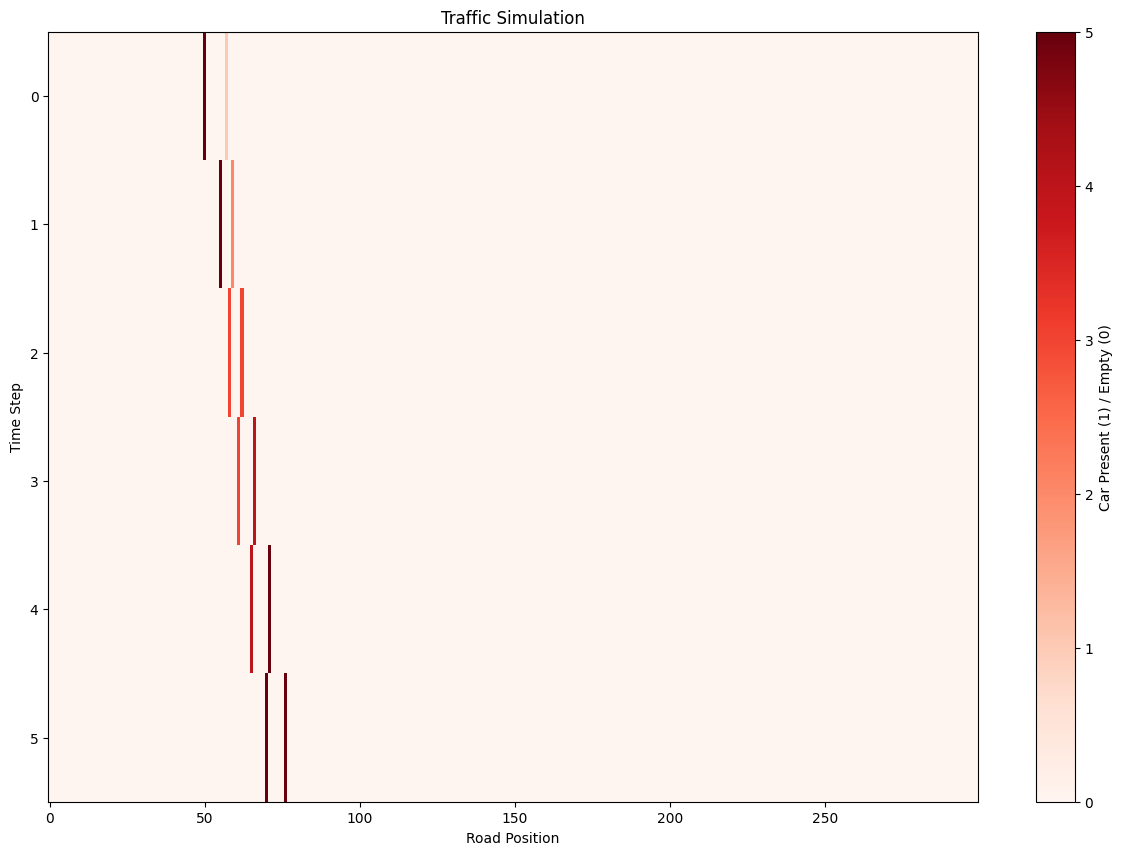

In [8]:
sim10table = np.zeros((6, road_length))
sim10 = TrafficSim(5, road_length, 0.1)
pos = np.zeros((road_length, ), dtype=int)
velo = np.zeros((road_length, ), dtype=int)
pos[50] = 1
pos[57] = 1
velo[50] = 5
velo[57] = 1
sim10.setcars(pos, velo)
sim10table[:, np.newaxis]

sim10table[0] = sim10.velocities

for i in range(5):
  sim10.update()
  sim10table[i + 1] = sim10.velocities

plt.figure(figsize=(15, 10))
plt.imshow(sim10table, cmap='Reds', interpolation='nearest', aspect='auto')
plt.title('Traffic Simulation')
plt.xlabel('Road Position')
plt.ylabel('Time Step')
plt.colorbar(label='Car Present (1) / Empty (0)')
plt.show()

As you can see in the graph above, the car starting at index 50 starts at a speed of 5 which is already the maximum, in the next time step, you can see that its speed had not increased as the color has not changed meanwhile the car in front has sped up by 1 as it is less than the max speed of 5. At time step three, the car behind is now going fast enough and is close enough to the car in front that it must decelerate to end up right behind where the car in front of it was at the previous time step. At time step 2 they are at 55 and 59, so distance is 3, and looking ahead at the graph at time 3, we see that the car behind went 3 spaces to end at 58 (1 space behind where the front car was at t = 2) and has a speed of 3 based on the scale on the left. Finally, we see that after the slowdown they resume accelerating to max speed. Therefore, we can see that the algorithm has been appropriately implemented.

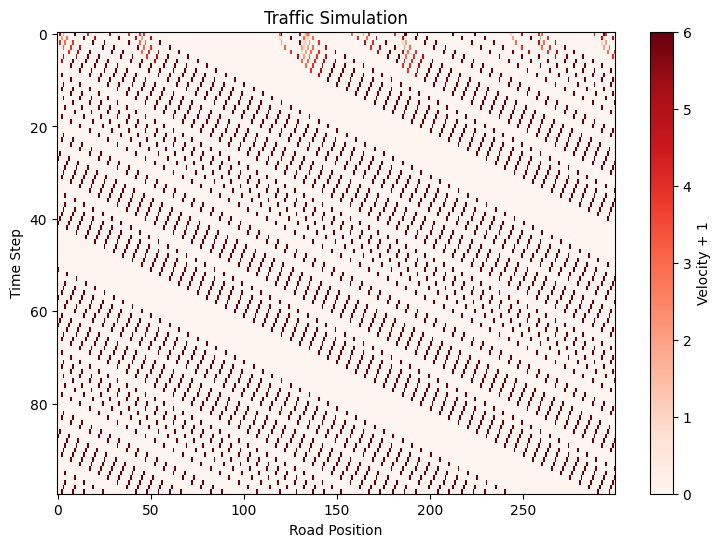

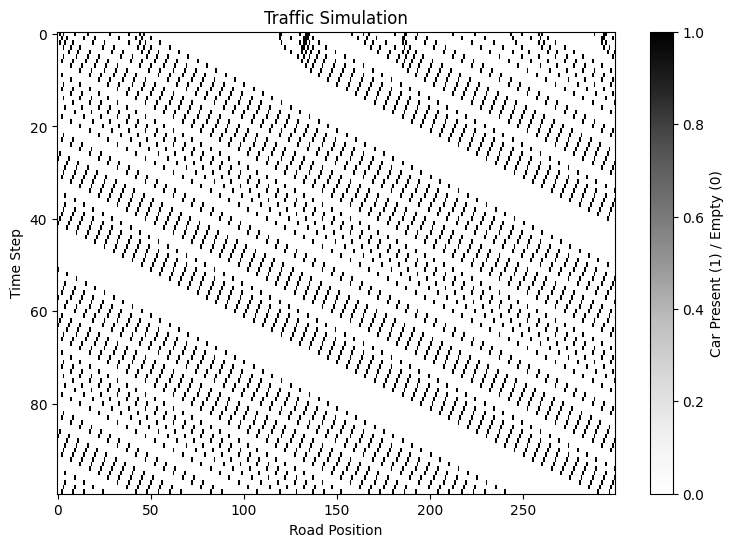

In [9]:
sim10tablev = np.zeros((100, road_length))
sim10tablep = np.zeros((100, road_length))
sim10 = TrafficSim(vmax, road_length, 0.1)
sim10.initialize()
sim10tablev[0] = sim10.velocities + sim10.positions
sim10tablep[0] = sim10.positions
for i in range(99):
  sim10.update()
  sim10tablev[i + 1] = sim10.velocities + sim10.positions
  sim10tablep[i + 1] = sim10.positions
plt.figure(figsize=(9, 6))
plt.imshow(sim10tablev, cmap='Reds', interpolation='nearest', aspect='auto')
plt.title('Traffic Simulation')
plt.xlabel('Road Position')
plt.ylabel('Time Step')
plt.colorbar(label='Velocity + 1')
plt.show()
plt.figure(figsize=(9, 6))
plt.imshow(sim10tablep, cmap='Greys', interpolation='nearest', aspect='auto')
plt.title('Traffic Simulation')
plt.xlabel('Road Position')
plt.ylabel('Time Step')
plt.colorbar(label='Car Present (1) / Empty (0)')
plt.show()

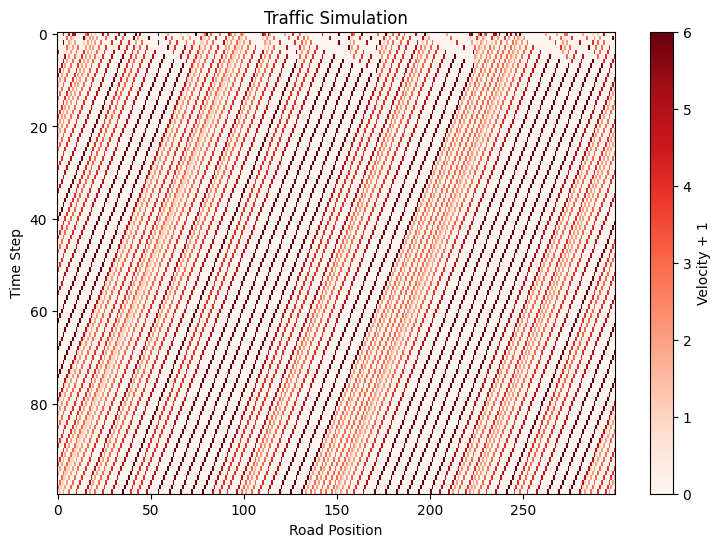

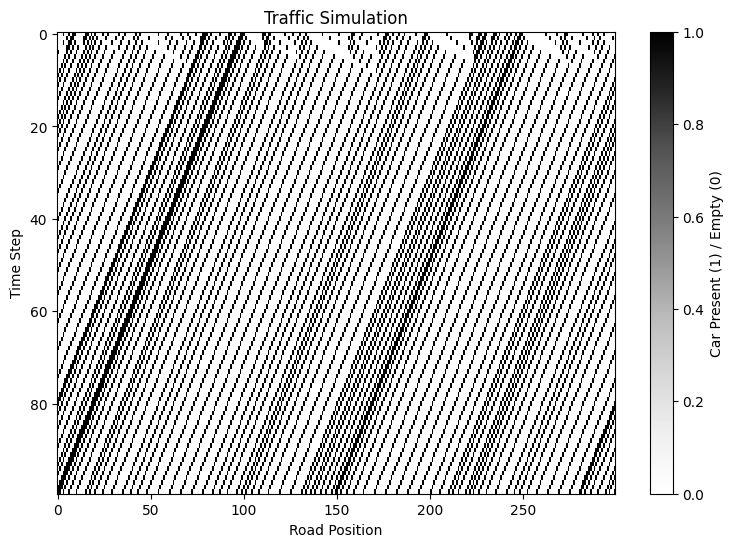

In [10]:
sim25tablev = np.zeros((100, road_length))
sim25tablep = np.zeros((100, road_length))
sim25 = TrafficSim(vmax, road_length, 0.25)
sim25.initialize()
sim25tablev[0] = sim25.velocities + sim25.positions
sim25tablep[0] = sim25.positions
for i in range(99):
  sim25.update()
  sim25tablev[i + 1] = sim25.velocities + sim25.positions
  sim25tablep[i + 1] = sim25.positions
plt.figure(figsize=(9, 6))
plt.imshow(sim25tablev, cmap='Reds', interpolation='nearest', aspect='auto')
plt.title('Traffic Simulation')
plt.xlabel('Road Position')
plt.ylabel('Time Step')
plt.colorbar(label='Velocity + 1')
plt.show()
plt.figure(figsize=(9, 6))
plt.imshow(sim25tablep, cmap='Greys', interpolation='nearest', aspect='auto')
plt.title('Traffic Simulation')
plt.xlabel('Road Position')
plt.ylabel('Time Step')
plt.colorbar(label='Car Present (1) / Empty (0)')
plt.show()

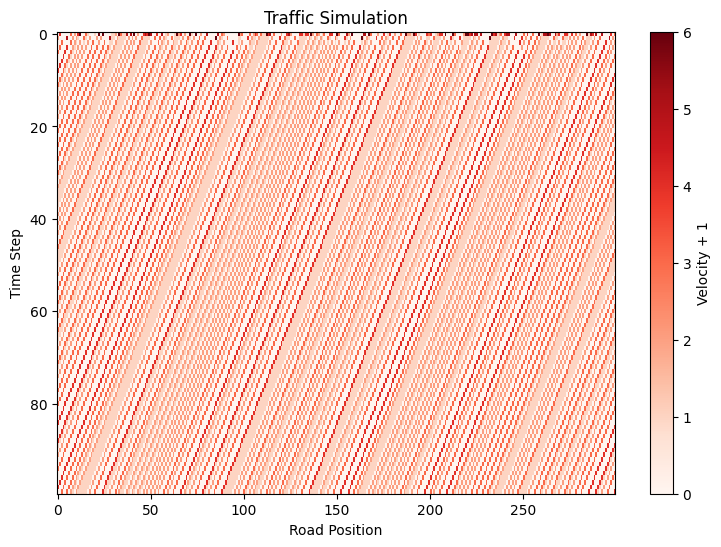

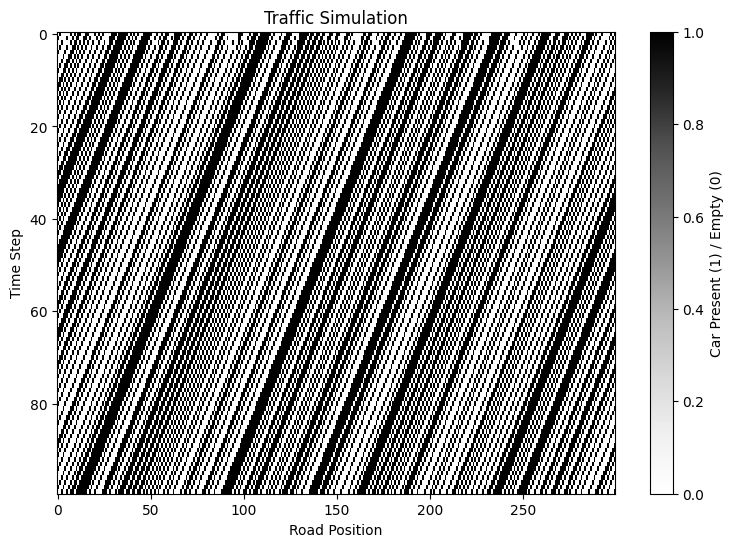

In [11]:
sim50tablev = np.zeros((100, road_length))
sim50tablep = np.zeros((100, road_length))
sim50 = TrafficSim(vmax, road_length, 0.5)
sim50.initialize()
sim50tablev[0] = sim50.velocities + sim50.positions
sim50tablep[0] = sim50.positions
for i in range(99):
  sim50.update()
  sim50tablev[i + 1] = sim50.velocities + sim50.positions
  sim50tablep[i + 1] = sim50.positions
plt.figure(figsize=(9, 6))
plt.imshow(sim50tablev, cmap='Reds', interpolation='nearest', aspect='auto')
plt.title('Traffic Simulation')
plt.xlabel('Road Position')
plt.ylabel('Time Step')
plt.colorbar(label='Velocity + 1')
plt.show()
plt.figure(figsize=(9, 6))
plt.imshow(sim50tablep, cmap='Greys', interpolation='nearest', aspect='auto')
plt.title('Traffic Simulation')
plt.xlabel('Road Position')
plt.ylabel('Time Step')
plt.colorbar(label='Car Present (1) / Empty (0)')
plt.show()

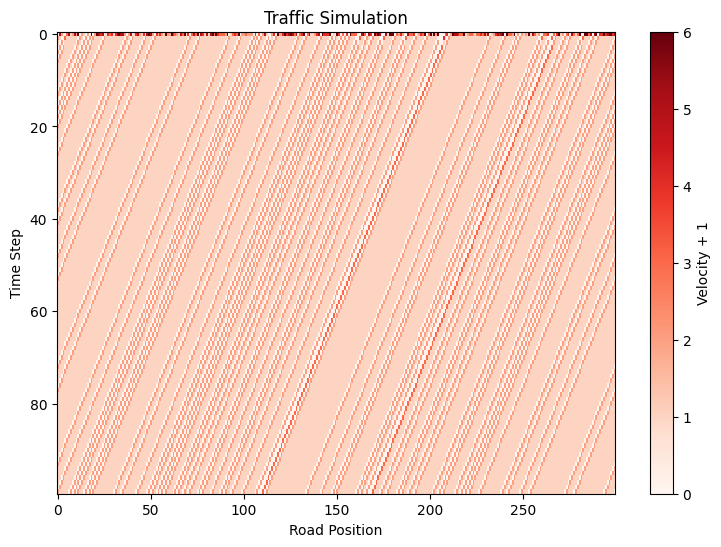

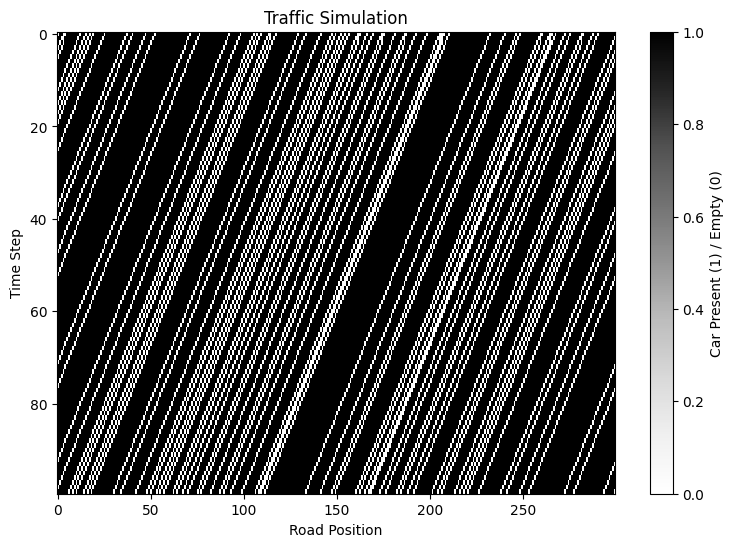

In [12]:
sim80tablev = np.zeros((100, road_length))
sim80tablep = np.zeros((100, road_length))
sim80 = TrafficSim(vmax, road_length, 0.8)
sim80.initialize()
sim80tablev[0] = sim80.velocities + sim80.positions
sim80tablep[0] = sim80.positions
for i in range(99):
  sim80.update()
  sim80tablev[i + 1] = sim80.velocities + sim80.positions
  sim80tablep[i + 1] = sim80.positions
plt.figure(figsize=(9, 6))
plt.imshow(sim80tablev, cmap='Reds', interpolation='nearest', aspect='auto')
plt.title('Traffic Simulation')
plt.xlabel('Road Position')
plt.ylabel('Time Step')
plt.colorbar(label='Velocity + 1')
plt.show()
plt.figure(figsize=(9, 6))
plt.imshow(sim80tablep, cmap='Greys', interpolation='nearest', aspect='auto')
plt.title('Traffic Simulation')
plt.xlabel('Road Position')
plt.ylabel('Time Step')
plt.colorbar(label='Car Present (1) / Empty (0)')
plt.show()

Based on these 8 graphs, we can say that our code does match the algorithm and our observations do support the ideas of section 8.2. Note: for the velocity graphs, I had to do velocity + position because if I just graph velocity, there would be no differentiation between a car with speed 0 and an empty space. Before any other commentary, we can see right away that our graph of 10% density looks extremely similar to their figure 8.4 where there are a handful of slowdowns initially, but they are quickly resolved and all the cars are able to reach maximum speed and simly maintain that speed forever. The textbook does not provide any graphs for 25%, 50%, or 80%, but it does say that if the density is greater than 1/6 there will be at least one traffic jam which moves forward uniformly and after an initial adjustment phase we reach a steady traffic situation (this is because it requires 6 cells for cars to maintain maximum speed so you need to have a car less than every 6 cells in order for this to be possible). Our graphs support this notion because our 25, 50, and 80% graphs all have traffic jams demonstrated by the thicker lines as cars are being forced to stop because the cars in front are moving slowly. Additionally, we can see that after the first 10 updates or so, they reach a constant state where the pattern simply repeats itself (steady traffic situation).

In [13]:
dally_factor = 0.2

In [14]:
class TrafficSimDally:
  def __init__(self, vmax, road_length, density, dally_factor):
    self.vmax = vmax
    self.road_length = road_length
    self.num_cars = int(road_length*density)
    self.positions = np.zeros(road_length, dtype=int)
    self.velocities = np.zeros(road_length, dtype=int)
    self.dally_factor = dally_factor
  def initialize(self):
    car_indices = np.zeros(self.num_cars, dtype=int)
    car_indices = random.sample(range(1, self.road_length), self.num_cars)
    for i in car_indices:
      self.positions[i] = 1
      self.velocities[i] = random.randint(0, self.vmax)
  def update(self):
    i = 0
    temp_positions = np.zeros(self.road_length, dtype = int)
    temp_velocities = np.zeros(self.road_length, dtype = int)
    while i < self.road_length:
      if self.positions[i] == 1:

        vi = self.velocities[i]

        for j in range(5):
          if self.positions[(i + j + 1) % self.road_length] == 1:
            d = j
            break
          d = 1000
        #accelerate
        vi = min(vi + 1, self.vmax)
        #decelerate
        if vi > d:
          vi = d
        #dally
        if random.random() < self.dally_factor:
          vi = max(vi - 1, 0)

        temp_positions[(i + vi) % self.road_length] = 1

        temp_velocities[(i + vi) % self.road_length] = vi

        i = i + vi + 1
      else:
        i += 1

    self.positions = temp_positions.copy()
    self.velocities = temp_velocities.copy()


  def display(self):
    road_display = ''
    for i in range(self.road_length):
      if self.positions[i] == 1:
        road_display += str(self.velocities[i])
      else:
        road_display += '-'
    print(road_display)

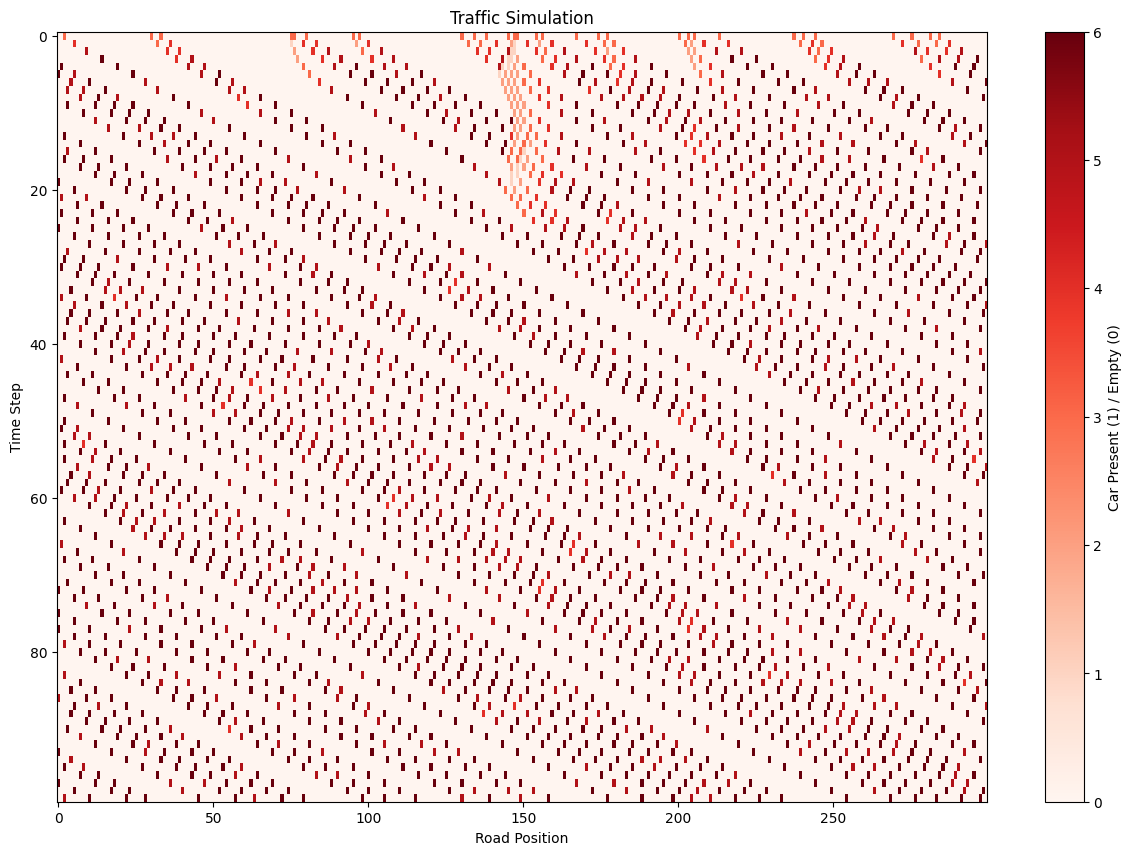

In [19]:
sim10table = np.zeros((100, road_length))
sim10 = TrafficSimDally(vmax, road_length, 0.1, 0.2)
sim10.initialize()
for i in range(road_length):
  if sim10.positions[i] == 1:
    sim10.velocities[i] = 2
sim10table[0] = sim10.positions + sim10.velocities
for i in range(99):
  sim10.update()
  sim10table[i + 1] = sim10.positions + sim10.velocities
plt.figure(figsize=(15, 10))
plt.imshow(sim10table, cmap='Reds', interpolation='nearest', aspect='auto')
plt.title('Traffic Simulation')
plt.xlabel('Road Position')
plt.ylabel('Time Step')
plt.colorbar(label='Car Present (1) / Empty (0)')
plt.show()

1.2.1 Part 1, I wasn't sure what initial impulse meant, so later I go much more in depth, but someone on ed discussion said it might mean starting all the cars with the same intial speed, so this is my graph of that instance. As you can see, they all start with a velcity of 2, and after the initial adjustment phase, they mostly straighten out going max speed, but because of the dally they are no longer straight lines like before and you can see the speed fluctuating by the colors getting lighter randomly.

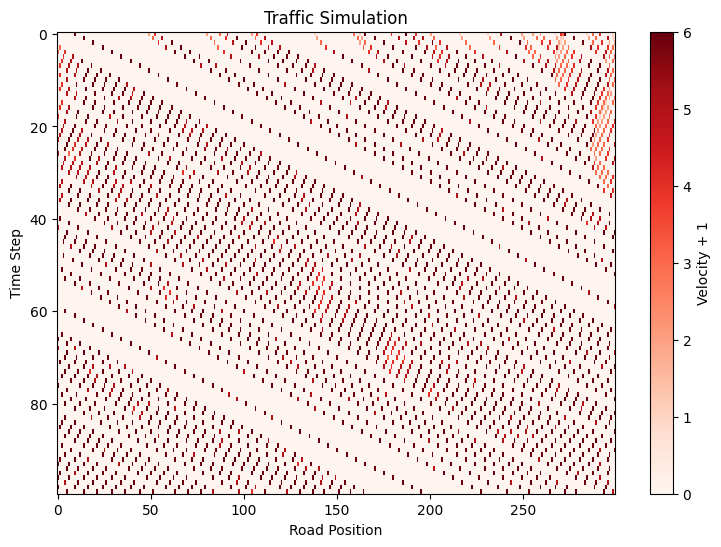

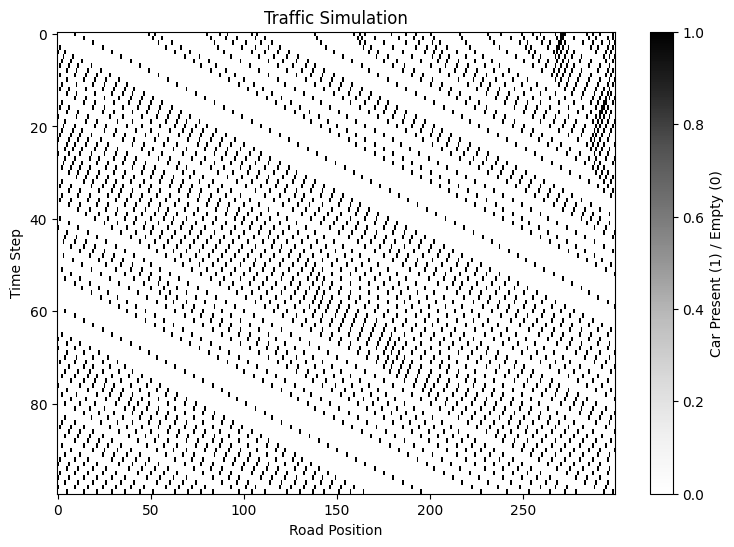

In [22]:
sim10tablev = np.zeros((100, road_length))
sim10tablep = np.zeros((100, road_length))
sim10 = TrafficSimDally(vmax, road_length, 0.1, 0.1)
sim10.initialize()
sim10tablev[0] = sim10.velocities + sim10.positions
sim10tablep[0] = sim10.positions
for i in range(99):
  sim10.update()
  sim10tablev[i + 1] = sim10.velocities + sim10.positions
  sim10tablep[i + 1] = sim10.positions
plt.figure(figsize=(9, 6))
plt.imshow(sim10tablev, cmap='Reds', interpolation='nearest', aspect='auto')
plt.title('Traffic Simulation')
plt.xlabel('Road Position')
plt.ylabel('Time Step')
plt.colorbar(label='Velocity + 1')
plt.show()
plt.figure(figsize=(9, 6))
plt.imshow(sim10tablep, cmap='Greys', interpolation='nearest', aspect='auto')
plt.title('Traffic Simulation')
plt.xlabel('Road Position')
plt.ylabel('Time Step')
plt.colorbar(label='Car Present (1) / Empty (0)')
plt.show()

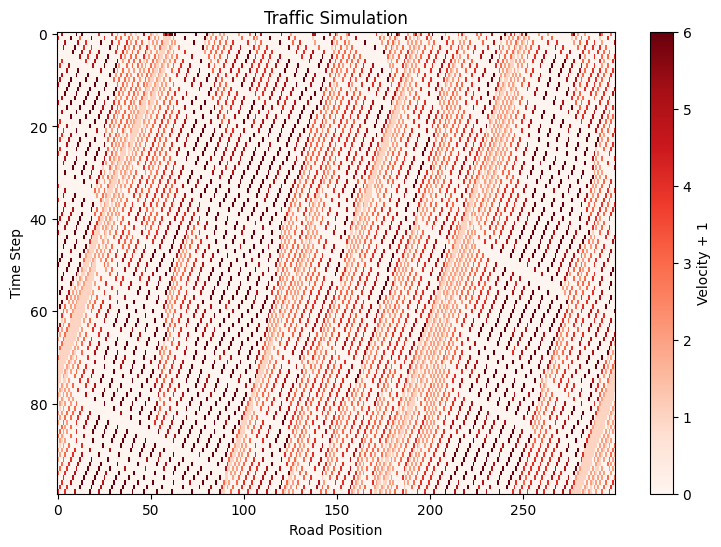

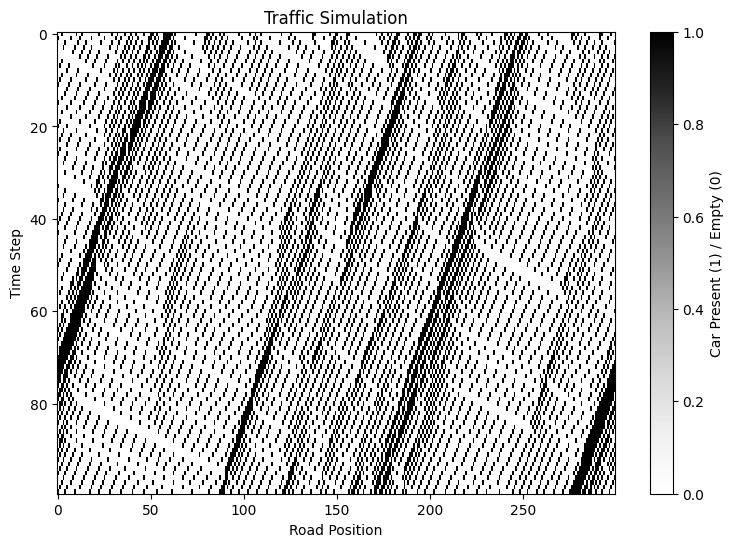

In [23]:
sim10tablev = np.zeros((100, road_length))
sim10tablep = np.zeros((100, road_length))
sim10 = TrafficSimDally(vmax, road_length, 0.25, 0.1)
sim10.initialize()
sim10tablev[0] = sim10.velocities + sim10.positions
sim10tablep[0] = sim10.positions
for i in range(99):
  sim10.update()
  sim10tablev[i + 1] = sim10.velocities + sim10.positions
  sim10tablep[i + 1] = sim10.positions
plt.figure(figsize=(9, 6))
plt.imshow(sim10tablev, cmap='Reds', interpolation='nearest', aspect='auto')
plt.title('Traffic Simulation')
plt.xlabel('Road Position')
plt.ylabel('Time Step')
plt.colorbar(label='Velocity + 1')
plt.show()
plt.figure(figsize=(9, 6))
plt.imshow(sim10tablep, cmap='Greys', interpolation='nearest', aspect='auto')
plt.title('Traffic Simulation')
plt.xlabel('Road Position')
plt.ylabel('Time Step')
plt.colorbar(label='Car Present (1) / Empty (0)')
plt.show()

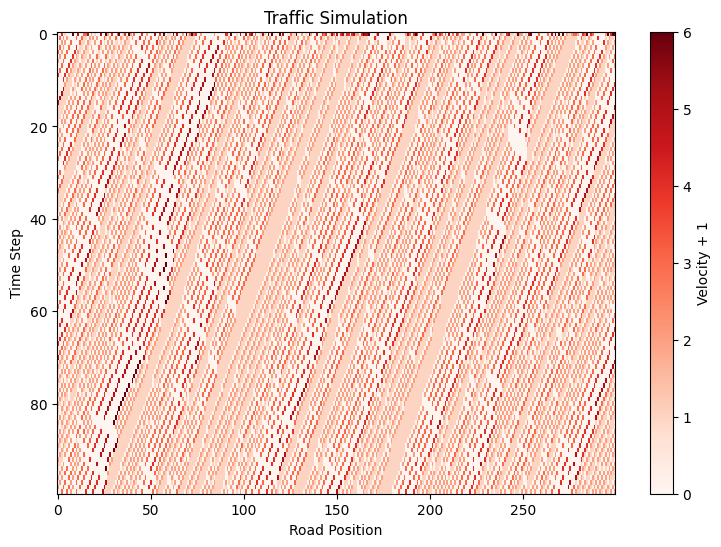

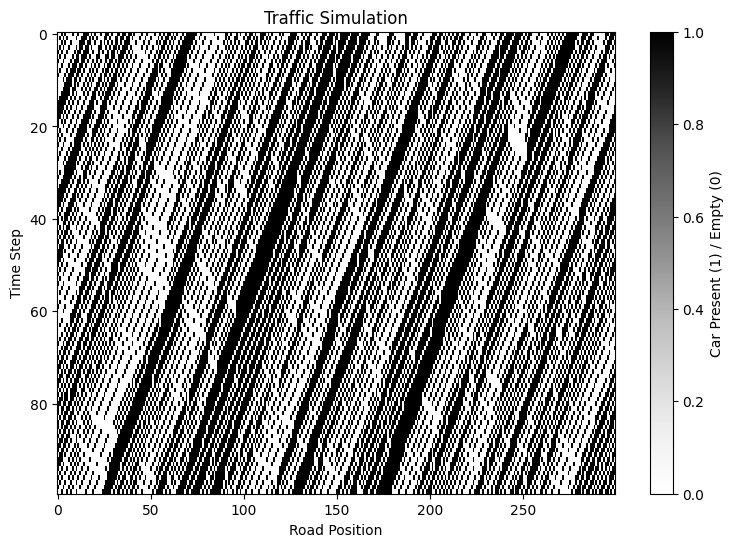

In [25]:
sim10tablev = np.zeros((100, road_length))
sim10tablep = np.zeros((100, road_length))
sim10 = TrafficSimDally(vmax, road_length, 0.5, 0.1)
sim10.initialize()
sim10tablev[0] = sim10.velocities + sim10.positions
sim10tablep[0] = sim10.positions
for i in range(99):
  sim10.update()
  sim10tablev[i + 1] = sim10.velocities + sim10.positions
  sim10tablep[i + 1] = sim10.positions
plt.figure(figsize=(9, 6))
plt.imshow(sim10tablev, cmap='Reds', interpolation='nearest', aspect='auto')
plt.title('Traffic Simulation')
plt.xlabel('Road Position')
plt.ylabel('Time Step')
plt.colorbar(label='Velocity + 1')
plt.show()
plt.figure(figsize=(9, 6))
plt.imshow(sim10tablep, cmap='Greys', interpolation='nearest', aspect='auto')
plt.title('Traffic Simulation')
plt.xlabel('Road Position')
plt.ylabel('Time Step')
plt.colorbar(label='Car Present (1) / Empty (0)')
plt.show()

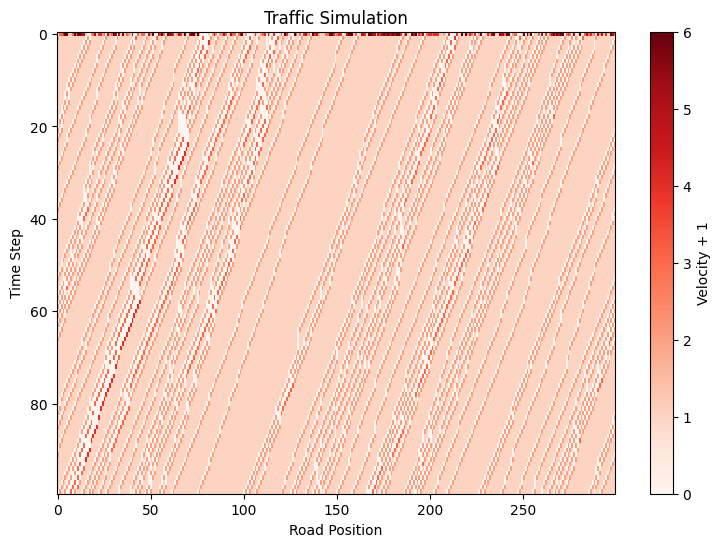

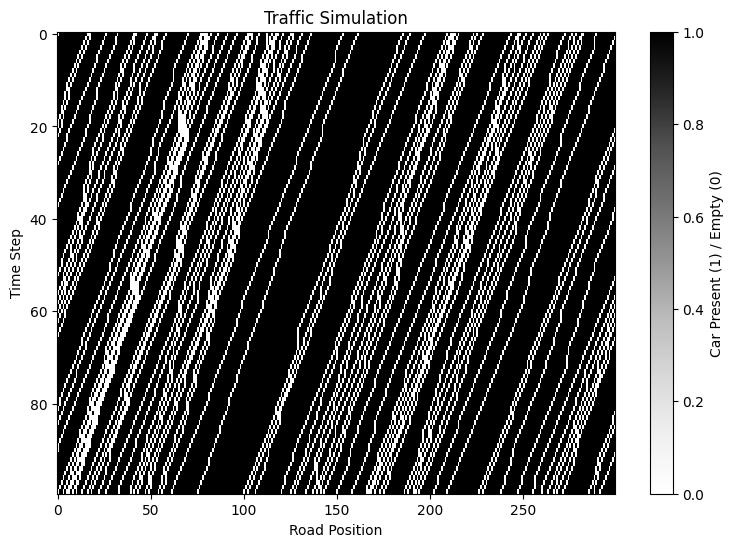

In [26]:
sim10tablev = np.zeros((100, road_length))
sim10tablep = np.zeros((100, road_length))
sim10 = TrafficSimDally(vmax, road_length, 0.8, 0.1)
sim10.initialize()
sim10tablev[0] = sim10.velocities + sim10.positions
sim10tablep[0] = sim10.positions
for i in range(99):
  sim10.update()
  sim10tablev[i + 1] = sim10.velocities + sim10.positions
  sim10tablep[i + 1] = sim10.positions
plt.figure(figsize=(9, 6))
plt.imshow(sim10tablev, cmap='Reds', interpolation='nearest', aspect='auto')
plt.title('Traffic Simulation')
plt.xlabel('Road Position')
plt.ylabel('Time Step')
plt.colorbar(label='Velocity + 1')
plt.show()
plt.figure(figsize=(9, 6))
plt.imshow(sim10tablep, cmap='Greys', interpolation='nearest', aspect='auto')
plt.title('Traffic Simulation')
plt.xlabel('Road Position')
plt.ylabel('Time Step')
plt.colorbar(label='Car Present (1) / Empty (0)')
plt.show()

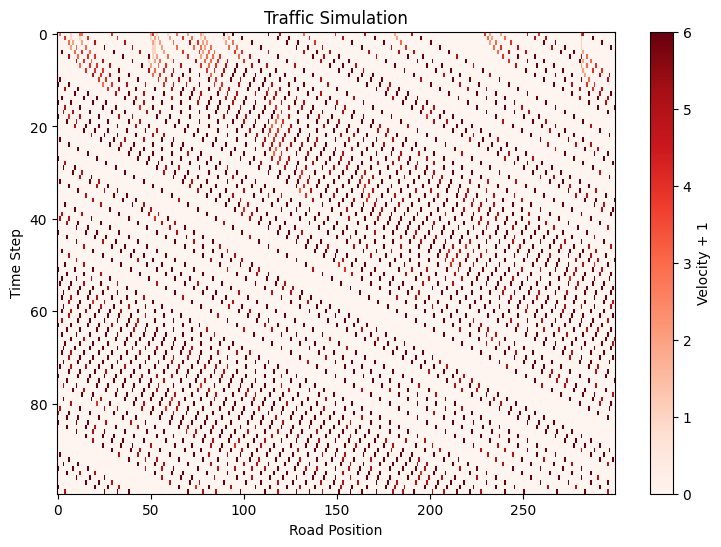

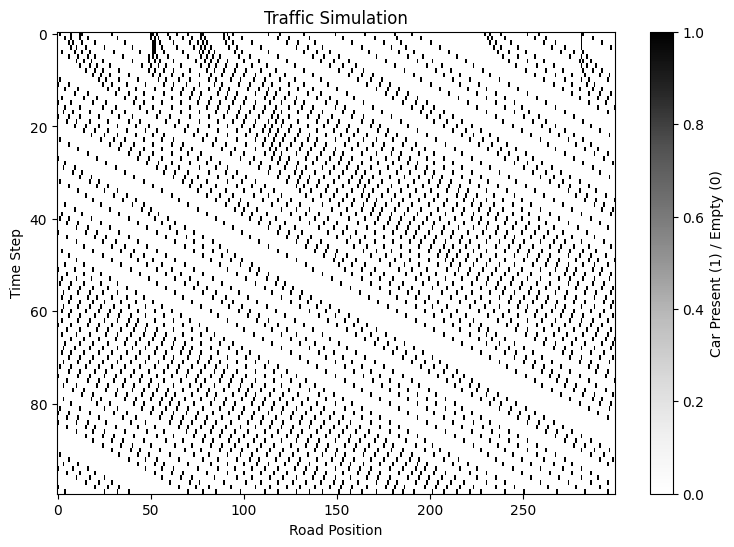

In [27]:
sim10tablev = np.zeros((100, road_length))
sim10tablep = np.zeros((100, road_length))
sim10 = TrafficSimDally(vmax, road_length, 0.1, 0.2)
sim10.initialize()
sim10tablev[0] = sim10.velocities + sim10.positions
sim10tablep[0] = sim10.positions
for i in range(99):
  sim10.update()
  sim10tablev[i + 1] = sim10.velocities + sim10.positions
  sim10tablep[i + 1] = sim10.positions
plt.figure(figsize=(9, 6))
plt.imshow(sim10tablev, cmap='Reds', interpolation='nearest', aspect='auto')
plt.title('Traffic Simulation')
plt.xlabel('Road Position')
plt.ylabel('Time Step')
plt.colorbar(label='Velocity + 1')
plt.show()
plt.figure(figsize=(9, 6))
plt.imshow(sim10tablep, cmap='Greys', interpolation='nearest', aspect='auto')
plt.title('Traffic Simulation')
plt.xlabel('Road Position')
plt.ylabel('Time Step')
plt.colorbar(label='Car Present (1) / Empty (0)')
plt.show()

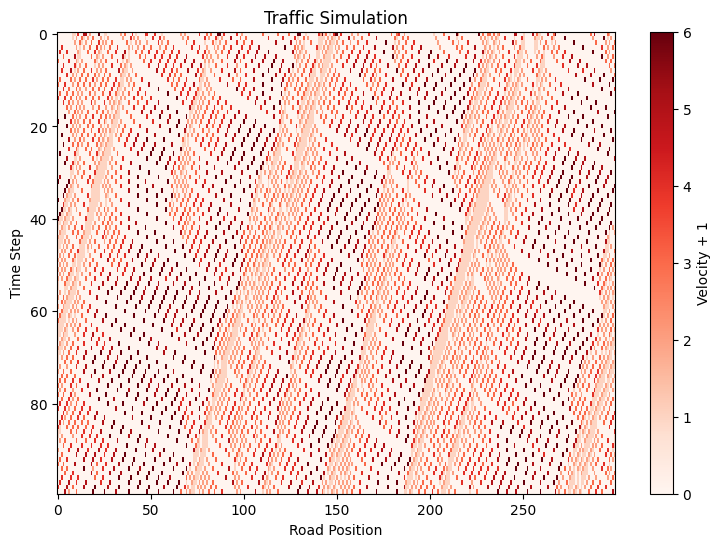

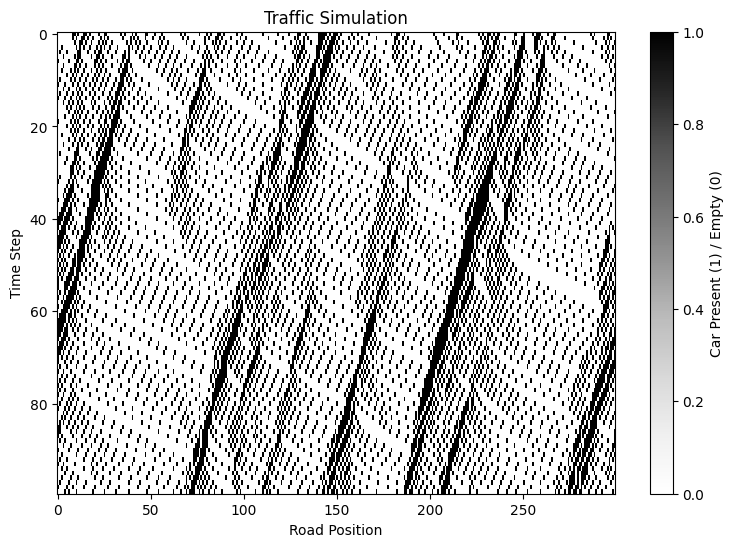

In [29]:
sim10tablev = np.zeros((100, road_length))
sim10tablep = np.zeros((100, road_length))
sim10 = TrafficSimDally(vmax, road_length, 0.25, 0.2)
sim10.initialize()
sim10tablev[0] = sim10.velocities + sim10.positions
sim10tablep[0] = sim10.positions
for i in range(99):
  sim10.update()
  sim10tablev[i + 1] = sim10.velocities + sim10.positions
  sim10tablep[i + 1] = sim10.positions
plt.figure(figsize=(9, 6))
plt.imshow(sim10tablev, cmap='Reds', interpolation='nearest', aspect='auto')
plt.title('Traffic Simulation')
plt.xlabel('Road Position')
plt.ylabel('Time Step')
plt.colorbar(label='Velocity + 1')
plt.show()
plt.figure(figsize=(9, 6))
plt.imshow(sim10tablep, cmap='Greys', interpolation='nearest', aspect='auto')
plt.title('Traffic Simulation')
plt.xlabel('Road Position')
plt.ylabel('Time Step')
plt.colorbar(label='Car Present (1) / Empty (0)')
plt.show()

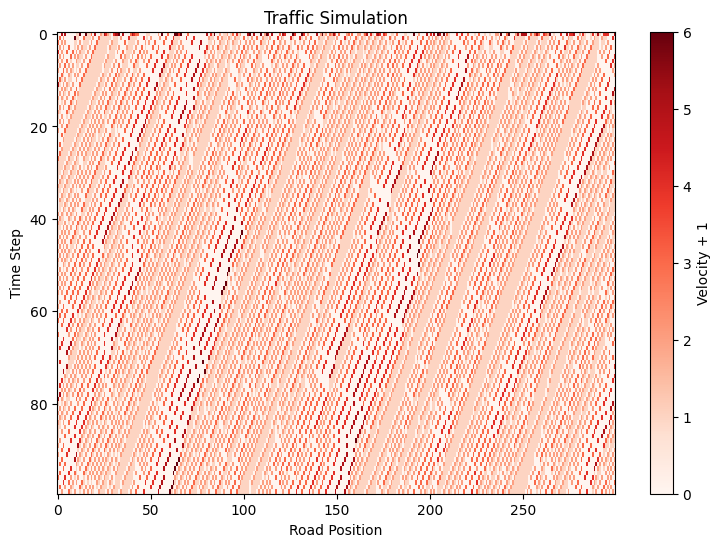

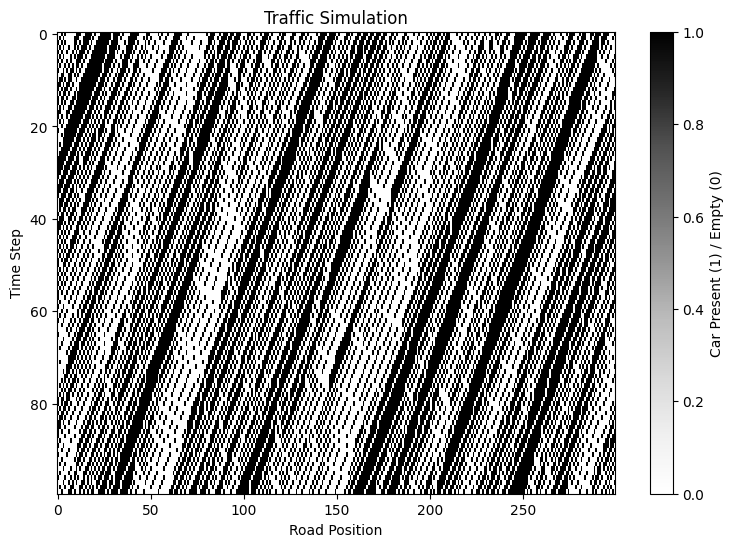

In [30]:
sim10tablev = np.zeros((100, road_length))
sim10tablep = np.zeros((100, road_length))
sim10 = TrafficSimDally(vmax, road_length, 0.5, 0.1)
sim10.initialize()
sim10tablev[0] = sim10.velocities + sim10.positions
sim10tablep[0] = sim10.positions
for i in range(99):
  sim10.update()
  sim10tablev[i + 1] = sim10.velocities + sim10.positions
  sim10tablep[i + 1] = sim10.positions
plt.figure(figsize=(9, 6))
plt.imshow(sim10tablev, cmap='Reds', interpolation='nearest', aspect='auto')
plt.title('Traffic Simulation')
plt.xlabel('Road Position')
plt.ylabel('Time Step')
plt.colorbar(label='Velocity + 1')
plt.show()
plt.figure(figsize=(9, 6))
plt.imshow(sim10tablep, cmap='Greys', interpolation='nearest', aspect='auto')
plt.title('Traffic Simulation')
plt.xlabel('Road Position')
plt.ylabel('Time Step')
plt.colorbar(label='Car Present (1) / Empty (0)')
plt.show()

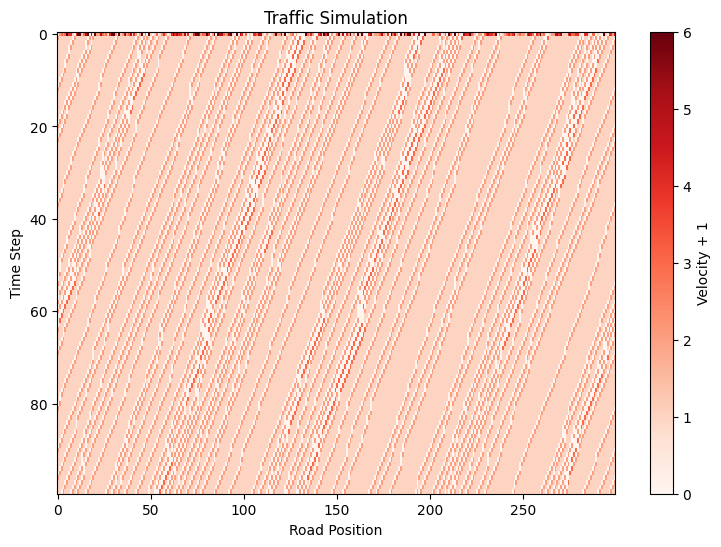

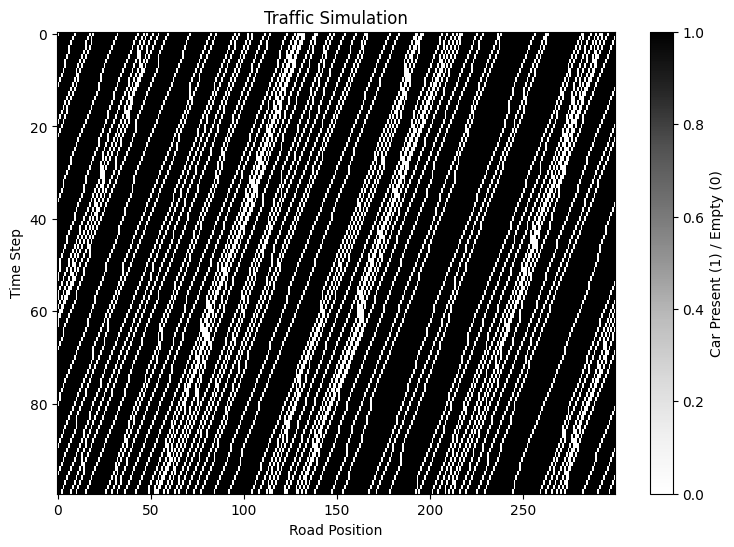

In [31]:
sim10tablev = np.zeros((100, road_length))
sim10tablep = np.zeros((100, road_length))
sim10 = TrafficSimDally(vmax, road_length, 0.8, 0.1)
sim10.initialize()
sim10tablev[0] = sim10.velocities + sim10.positions
sim10tablep[0] = sim10.positions
for i in range(99):
  sim10.update()
  sim10tablev[i + 1] = sim10.velocities + sim10.positions
  sim10tablep[i + 1] = sim10.positions
plt.figure(figsize=(9, 6))
plt.imshow(sim10tablev, cmap='Reds', interpolation='nearest', aspect='auto')
plt.title('Traffic Simulation')
plt.xlabel('Road Position')
plt.ylabel('Time Step')
plt.colorbar(label='Velocity + 1')
plt.show()
plt.figure(figsize=(9, 6))
plt.imshow(sim10tablep, cmap='Greys', interpolation='nearest', aspect='auto')
plt.title('Traffic Simulation')
plt.xlabel('Road Position')
plt.ylabel('Time Step')
plt.colorbar(label='Car Present (1) / Empty (0)')
plt.show()

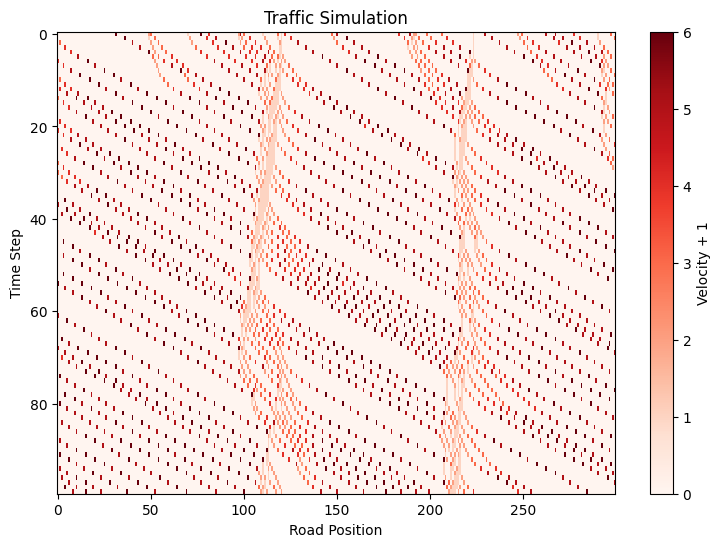

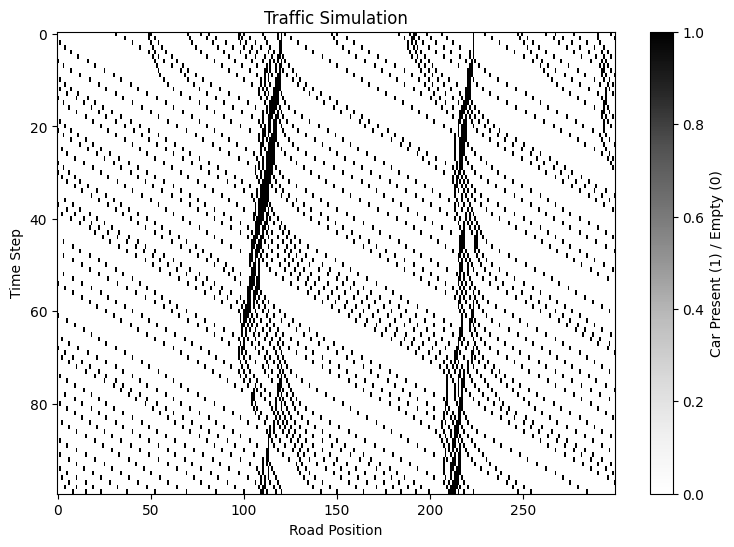

In [32]:
sim10tablev = np.zeros((100, road_length))
sim10tablep = np.zeros((100, road_length))
sim10 = TrafficSimDally(vmax, road_length, 0.1, 0.5)
sim10.initialize()
sim10tablev[0] = sim10.velocities + sim10.positions
sim10tablep[0] = sim10.positions
for i in range(99):
  sim10.update()
  sim10tablev[i + 1] = sim10.velocities + sim10.positions
  sim10tablep[i + 1] = sim10.positions
plt.figure(figsize=(9, 6))
plt.imshow(sim10tablev, cmap='Reds', interpolation='nearest', aspect='auto')
plt.title('Traffic Simulation')
plt.xlabel('Road Position')
plt.ylabel('Time Step')
plt.colorbar(label='Velocity + 1')
plt.show()
plt.figure(figsize=(9, 6))
plt.imshow(sim10tablep, cmap='Greys', interpolation='nearest', aspect='auto')
plt.title('Traffic Simulation')
plt.xlabel('Road Position')
plt.ylabel('Time Step')
plt.colorbar(label='Car Present (1) / Empty (0)')
plt.show()

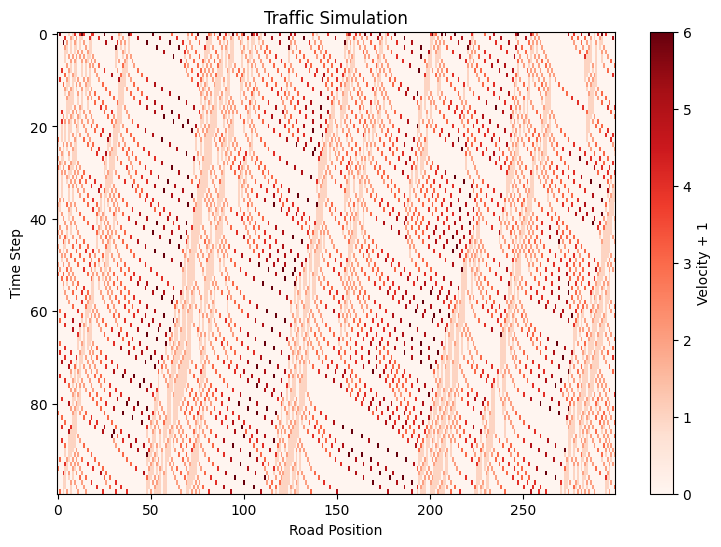

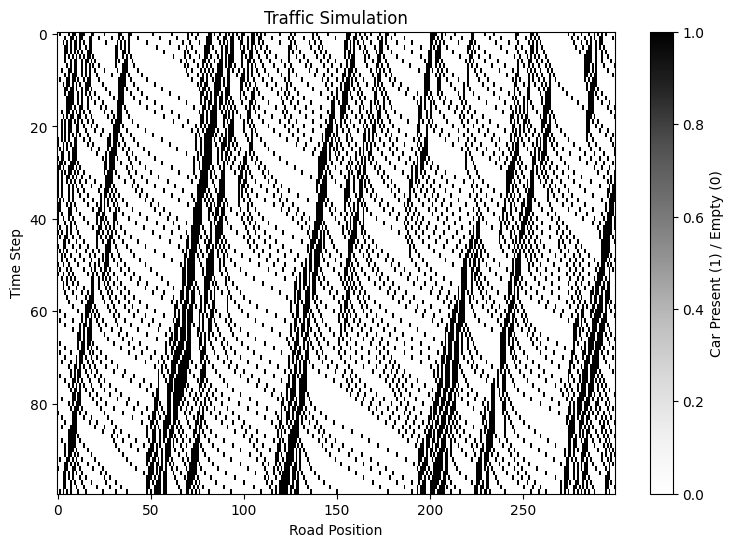

In [33]:
sim10tablev = np.zeros((100, road_length))
sim10tablep = np.zeros((100, road_length))
sim10 = TrafficSimDally(vmax, road_length, 0.25, 0.5)
sim10.initialize()
sim10tablev[0] = sim10.velocities + sim10.positions
sim10tablep[0] = sim10.positions
for i in range(99):
  sim10.update()
  sim10tablev[i + 1] = sim10.velocities + sim10.positions
  sim10tablep[i + 1] = sim10.positions
plt.figure(figsize=(9, 6))
plt.imshow(sim10tablev, cmap='Reds', interpolation='nearest', aspect='auto')
plt.title('Traffic Simulation')
plt.xlabel('Road Position')
plt.ylabel('Time Step')
plt.colorbar(label='Velocity + 1')
plt.show()
plt.figure(figsize=(9, 6))
plt.imshow(sim10tablep, cmap='Greys', interpolation='nearest', aspect='auto')
plt.title('Traffic Simulation')
plt.xlabel('Road Position')
plt.ylabel('Time Step')
plt.colorbar(label='Car Present (1) / Empty (0)')
plt.show()

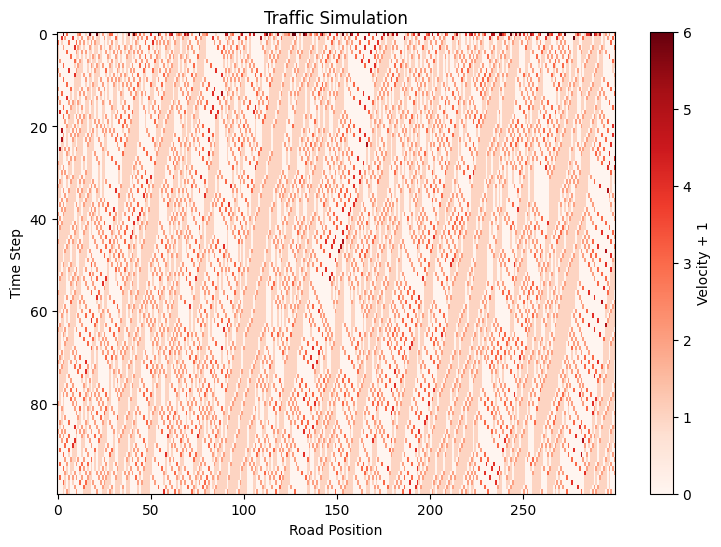

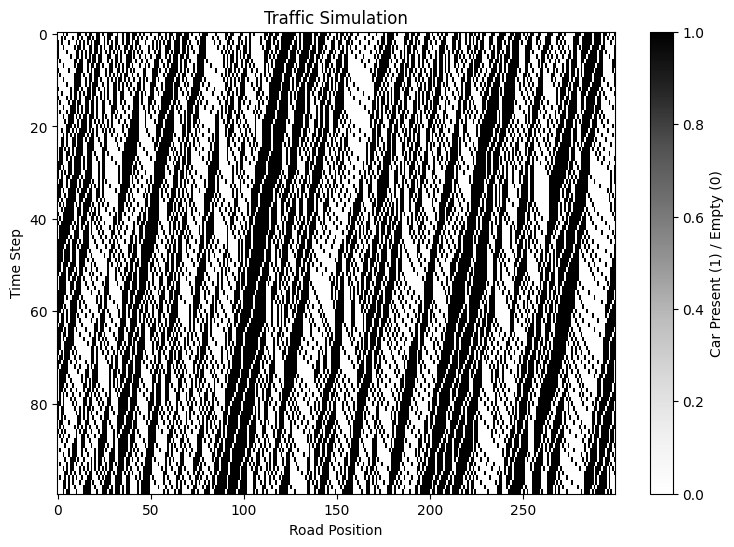

In [34]:
sim10tablev = np.zeros((100, road_length))
sim10tablep = np.zeros((100, road_length))
sim10 = TrafficSimDally(vmax, road_length, 0.5, 0.5)
sim10.initialize()
sim10tablev[0] = sim10.velocities + sim10.positions
sim10tablep[0] = sim10.positions
for i in range(99):
  sim10.update()
  sim10tablev[i + 1] = sim10.velocities + sim10.positions
  sim10tablep[i + 1] = sim10.positions
plt.figure(figsize=(9, 6))
plt.imshow(sim10tablev, cmap='Reds', interpolation='nearest', aspect='auto')
plt.title('Traffic Simulation')
plt.xlabel('Road Position')
plt.ylabel('Time Step')
plt.colorbar(label='Velocity + 1')
plt.show()
plt.figure(figsize=(9, 6))
plt.imshow(sim10tablep, cmap='Greys', interpolation='nearest', aspect='auto')
plt.title('Traffic Simulation')
plt.xlabel('Road Position')
plt.ylabel('Time Step')
plt.colorbar(label='Car Present (1) / Empty (0)')
plt.show()

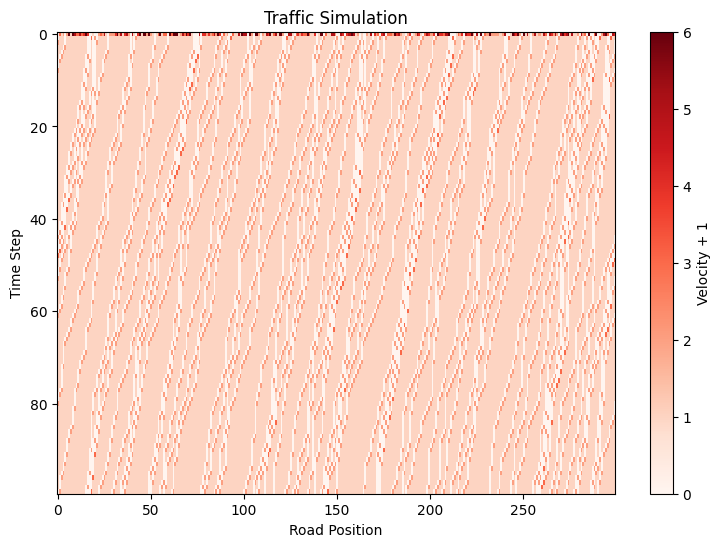

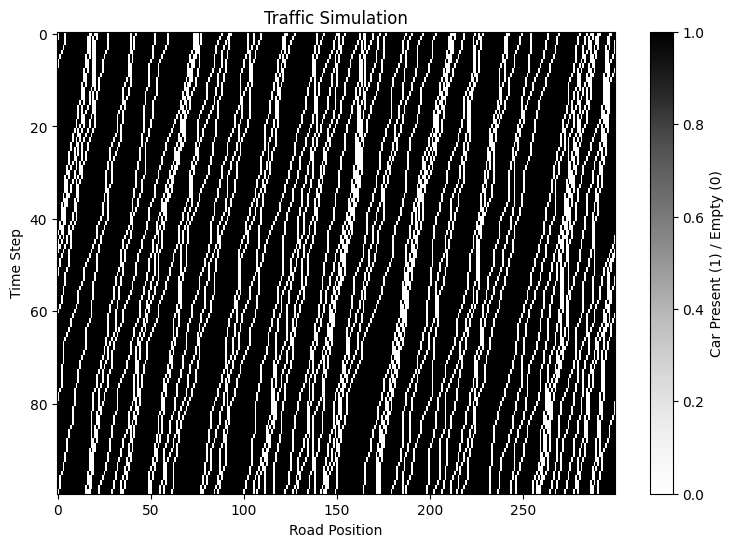

In [35]:
sim10tablev = np.zeros((100, road_length))
sim10tablep = np.zeros((100, road_length))
sim10 = TrafficSimDally(vmax, road_length, 0.8, 0.5)
sim10.initialize()
sim10tablev[0] = sim10.velocities + sim10.positions
sim10tablep[0] = sim10.positions
for i in range(99):
  sim10.update()
  sim10tablev[i + 1] = sim10.velocities + sim10.positions
  sim10tablep[i + 1] = sim10.positions
plt.figure(figsize=(9, 6))
plt.imshow(sim10tablev, cmap='Reds', interpolation='nearest', aspect='auto')
plt.title('Traffic Simulation')
plt.xlabel('Road Position')
plt.ylabel('Time Step')
plt.colorbar(label='Velocity + 1')
plt.show()
plt.figure(figsize=(9, 6))
plt.imshow(sim10tablep, cmap='Greys', interpolation='nearest', aspect='auto')
plt.title('Traffic Simulation')
plt.xlabel('Road Position')
plt.ylabel('Time Step')
plt.colorbar(label='Car Present (1) / Empty (0)')
plt.show()

1.2.1 Part 2 \\
I already talked about this a bit before when I tested it with all the same initial speeds (in case thats what impulse means), but here is my analysis that I made just about dally factor 0.2 in general compared to Task 1. \\
When we add a dally factor of 0.2, there are some clear differences from task one. The main is that because the cars randomly decelerate slightly, we do not reach a steady state in any circumstance: at 10% density the cars do not just sit at maximum speed and we occasionally see brief traffic jams, and at the higher densities, we also do not see the steady states of traffic jams of constant size which propagate left across the grid as time passes because there are dallies which cars to not come into contact with the traffic jam at consistent times and the cars on the front end occasionally hesitate before accelerating again both of which affect the thickness of the traffic jams meaning they can appear and disappear over time because of this new randomness.


1.2.2
Starting with the graphs of dally factor = .1. These graphs largely look similar to the graphs we created in task 1, but as stated in 1.2.1, they do not have the same steady states. Because the first graph is only 10% populated, it dallies rarely enough that no real traffic jams occur but there is some variation in the cars’ speeds. At the higher densities, like I said in 1.2.1, there are clear traffic jams, but they do not move at a constant speed and they do not maintain constant depth of them meaning they can appear and disappear randomly, especially at the lower densities, but generally last for 10-20 time steps because they are not dallying very often.
When we up the dally factor  to 0.2 these trends continue. With 10% density and 0.2 dally, there are occasionally full on traffic jams which can occur which wasn’t really the case with 0.1 dally factor. With 25% and 0.2 dally, we see more random traffic jams coming and going than with 0.1 dally. They still come and go, but they can grow to be very large at points. Also, they are now a larger percentage of the chart and the amount of cars driving at max speed has gone down because they are more likely to slow down and cause a slight hold up even if it doesn’t grow to a full traffic jam. 50% density with 0.2 dally looks extremely chaotic. There are very large traffic jams all over the place just because it is at 50% capacity, but they are extremely variant and fluctuate in size a lot. The 80% density 0.2 dally looks pretty similar to 80% density 0.1 dally simply because almost all of the graph is traffic jam, but the difference is that more often than in the 0.1 dally the car which is at the front of the jam does not accelerate when it should, meaning there are more vertical lines on the right side of the jams.
Upping the dally factor to 0.5 causes a lot of chaos. In the 10% density simulation we now see traffic jams showing up regularly and lasting for a surprisingly long time (in my currently run simulation a large one forms and lasts for the full last 60 timesteps). In the 20% density simulation, there are notable traffic jams all over the road most of which are not very thick, but it means there are very few periods of cars going full speed. Additionally, the fronts of the traffic jams move a lot slower because more often they do not accelerate away when they should. The 50% density simulation has very very few instances of cars consistently accelerating. Also, interestingly, some of the traffic jams do still go away or shrink significantly at times because cars get caught in other traffic jams and cannot repopulate the back of the jam. The last graph is the 80% density 0.5 dally simulation. There isn’t a lot to say about this one that hasn’t already been said: there are a ton of traffic jams which fluctuate pretty severely in size due to the 0.5 dally and the graph overall looks like a bunch of thin white squiggly lines.
To summarize, generally, as the dally factor goes up, the consistency of the traffic jams goes way down as they fluctuate in size much more meaning they can appear and disappear over time which was not the case without dallying. At smaller densities there tends to be more traffic jams as the dally factor goes up, especially noticeable at 10%. Lastly, without dallying, the traffic jams run parallel going back by one index each timestep, whereas with dallying, the traffic jams are no longer parallel and are more vertical because cars do not always leave from the front right away and do not join the back at a consistant rate.


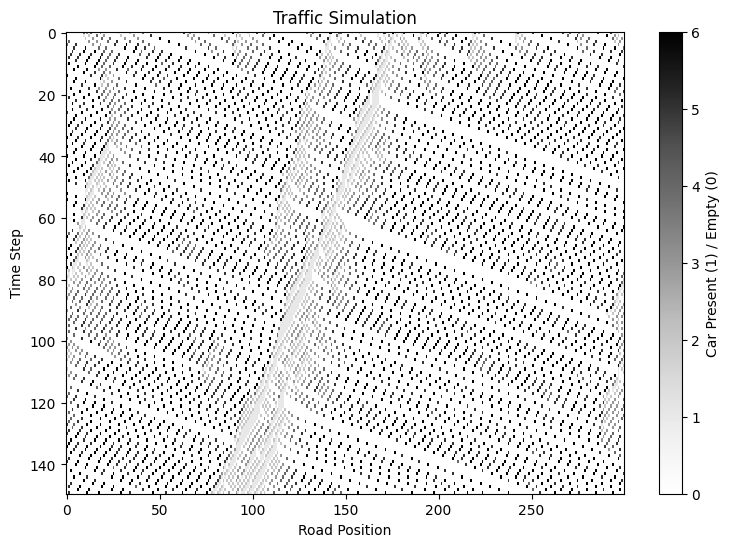

In [37]:
simtable = np.zeros((150, road_length))
sim = TrafficSimDally(vmax, road_length, 0.16, 0.2)
sim.initialize()
simtable[0] = sim.positions + sim.velocities
for i in range(149):
  sim.update()
  simtable[i + 1] = sim.positions + sim.velocities
plt.figure(figsize=(9, 6))
plt.imshow(simtable, cmap='Greys', interpolation='nearest', aspect='auto')
plt.title('Traffic Simulation')
plt.xlabel('Road Position')
plt.ylabel('Time Step')
plt.colorbar(label='Velocity + 1')
plt.show()

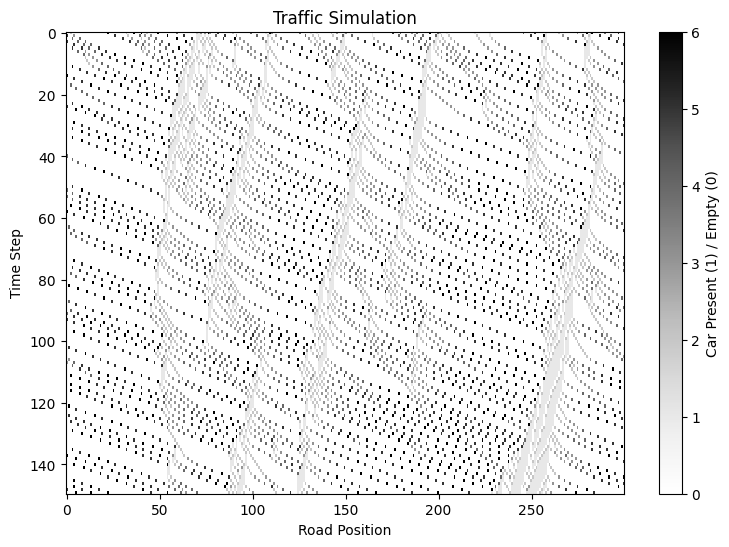

In [38]:
simtable = np.zeros((150, road_length))
sim = TrafficSimDally(vmax, road_length, 0.16, 0.5)
sim.initialize()
simtable[0] = sim.positions + sim.velocities
for i in range(149):
  sim.update()
  simtable[i + 1] = sim.positions + sim.velocities
plt.figure(figsize=(9, 6))
plt.imshow(simtable, cmap='Greys', interpolation='nearest', aspect='auto')
plt.title('Traffic Simulation')
plt.xlabel('Road Position')
plt.ylabel('Time Step')
plt.colorbar(label='Velocity + 1')
plt.show()

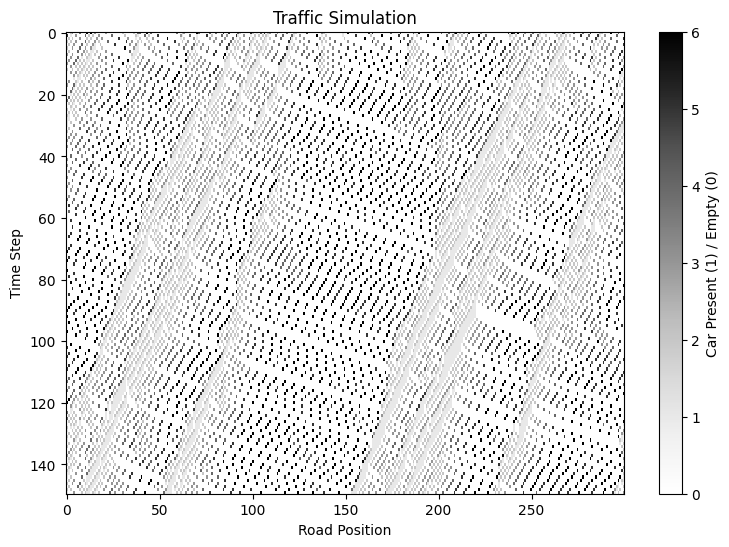

In [39]:
simtable = np.zeros((150, road_length))
sim = TrafficSimDally(vmax, road_length, 0.25, 0.2)
sim.initialize()
simtable[0] = sim.positions + sim.velocities
for i in range(149):
  sim.update()
  simtable[i + 1] = sim.positions + sim.velocities
plt.figure(figsize=(9, 6))
plt.imshow(simtable, cmap='Greys', interpolation='nearest', aspect='auto')
plt.title('Traffic Simulation')
plt.xlabel('Road Position')
plt.ylabel('Time Step')
plt.colorbar(label='Velocity + 1')
plt.show()

1.2.2 Cont. I would say that these previous three graphs look highly similar to figures 8.5-8.7 from the textbook. The first shows mostly cars going max or close to max speed with occasional traffic jams which disappear over time. The second shows most of the road is going max speed, but there are pretty frequent traffic jams especially given the low density. The final graph shows that when we increase the density we get traffic jams which are much more persistant and wider.

1.4.1 \\
Algorithm: \\
Switch = True
Accelerate: \\
vi = min(vi + 1, vmaxleft), if lane == left, \\
else, vi + min(vi + 1, vmaxright) \\
Continue straight: \\
if d(i, i + 1 in same lane) >= vi, Switch = False   \\
Check Switching: \\
if d(i, i + 1 in other lane) < vi, Switch = False \\
if d(i, i + 1 in same lane) + $v_{i-1}$ < vi, Switch = False
\\
if $v_{i-1}$ - d(i - 1 in same lane, i) > $v_i$, Switch = False \\
if $v_{i-1}$ - d(i - 1 in other lane, i) > $v_i$, Switch = False \\
else, Switch = True \\
Switch: \\
if Switch = True, lane = (lane + 1) % 1
\\
Decelerate: \\
vi = d(i, i + 1), if vi > d(i, i + 1) \\
Move: \\
vehicle i moves vi cells forward


Putting it in words is a lot simpler than writing an algorithm to be honest. First we assign switch = true. \\
Then we need to accelerate the car by increasing the speed of the car by 1 if the current speed + 1 is less than the maximum speed of the lane. \\
Then we check if we can just continue straight while accelerating with no issues by checking if the distance to the car in front is greater than our speed. If this is the case we also set Switch as false. \\
Next we need to check if we are able to switch lanes. First we check if there is a car in the other lane that we would directly run into, if this is the case we don't switch lanes and set switch to false. Then we check if the car ahead of us in our lane is moving so slow that if we switch lanes and they switch lanes we would crash into them because our velocity is greater than the distance to them plus their velocity, if they are moving that slow we set switch to false. Then we check if the next car back in the other lane is close enough that their velocity - the distance to them is greater than our speed meaning they would crash into us if we switched lanes, if this is the case we set switch to false. Last we check if there is a car behind us in our lane that if it chose to switch lanes would go fast enough that it would overtake us, aka their velocity - the distance to them is greater than our velocity meaning they would end on our space or a space ahead of us, if this is the case we set swithc to false. If none of these cases happen we set switch to true.
Next, if switch is true, we change the lane by adding one and using mod 2. \\
Now that the car is in the correct lane, we decelerate if the distance to the car in front is less than our velocity. \\
Finally, we move the car forward vi spaces.

In [59]:
class TwoLaneTrafficSim:
  def __init__(self, vl, vr, road_length, densityl, densityr):
    self.vl = vl
    self.vr = vr
    self.road_length = road_length
    self.num_carsl = int(road_length*densityl)
    self.num_carsr = int(road_length*densityr)
    self.positions = np.zeros((road_length, 2), dtype=int)
    self.velocities = np.zeros((road_length, 2), dtype=int)
  def initialize(self):
    car_indices_l = np.zeros(self.num_carsl, dtype=int)
    car_indices_l = random.sample(range(1, self.road_length), self.num_carsl)
    for i in car_indices_l:
      self.positions[i][0] = 1
      self.velocities[i][0] = random.randint(0, self.vl)
    car_indices_r = np.zeros(self.num_carsr, dtype=int)
    car_indices_r = random.sample(range(1, self.road_length), self.num_carsr)
    for i in car_indices_r:
      self.positions[i][1] = 1
      self.velocities[i][1] = random.randint(0, self.vr)
  def update(self):
    temp_positions = np.zeros((road_length, 2), dtype=int)
    temp_velocities = np.zeros((road_length, 2), dtype=int)
    switch = True
    for i in range(self.road_length):
      for j in range(2):
        #print(j)
        switch = True
        if self.positions[i][j] == 1:
          #print(i)
          #print(j)
          vi = self.velocities[i][j]
          for k in range(5):
            if self.positions[(i + k + 1) % self.road_length][j] == 1:
              d = k
              break
            d = 1000
          #accelerate
          if j == 0:
            vi = min(vi + 1, self.vl)
          else:
            vi = min(vi + 1, self.vr)

          # if there is a clear path ahead
          if vi <= d:
            #temp_positions[i][j] = 0
            temp_positions[(i + vi) % self.road_length][j] = 1
            #temp_velocities[i][j] = 0
            temp_velocities[(i + vi) % self.road_length][j] = vi
            #print("clear path")
            #print(i)
            switch = False
          else: # check if can switch lane

            #check if car directly in the way in other lane
            for k in range(vi + 1):
              if self.positions[(i + k) % self.road_length][(j+1) % 2] == 1: # there is a car in the other lane that we would hit
                vi = d #decelerate
                #stay in lane and update distance and speed
                #temp_positions[i][j] = 0
                temp_positions[(i + vi) % self.road_length][j] = 1
                #temp_velocities[i][j] = 0
                temp_velocities[(i + vi) % self.road_length][j] = vi
                #print("car directly in other lane")
                #print(i)
                switch = False
                break
            # check cars behind
            for k in range(self.vl):
              if self.positions[(i - k + self.road_length - 1) % self.road_length][(j+1) % 2] == 1: # go back up to vl spots to see if there is a car in other lane
                v_car_back = self.velocities[(i - k + self.road_length - 1) % self.road_length][(j+1) % 2]
                if v_car_back + 1 > k: # if car in other lane will catch up and pass dont switch

                  vi = d
                  #temp_positions[i][j] = 0
                  temp_positions[(i + vi) % self.road_length][j] = 1
                  #temp_velocities[i][j] = 0
                  temp_velocities[(i + vi) % self.road_length][j] = vi
                  #print("fast car behind in other lane")
                  #print(i)
                  switch = False
                  break
              if self.positions[(i - k + self.road_length - 1) % self.road_length][j] == 1: # go back up to vl spots to see if there is a car in own lane

                v_car_back = self.velocities[(i - k + self.road_length - 1) % self.road_length][j]
                if v_car_back + 1 > k: # if car in same lane will catch up and switch and impede switching dont switch

                  vi = d
                  #temp_positions[i][j] = 0
                  temp_positions[(i + vi) % self.road_length][j] = 1
                  #temp_velocities[i][j] = 0
                  temp_velocities[(i + vi) % self.road_length][j] = vi
                  #print("fast car back in same lane")
                  #print(i)
                  switch = False
                  break
            v_car_front = self.velocities[(i + d + 1) % self.road_length][j]

            if (v_car_front + 1 + d + 1) % self.road_length <= (vi) % self.road_length: # works
              #print(v_car_front + 1 + d + 1)
              #print(vi + i)


              vi = d
              #temp_positions[i][j] = 0
              temp_positions[(i + vi) % self.road_length][j] = 1
              #temp_velocities[i][j] = 0
              temp_velocities[(i + vi) % self.road_length][j] = vi
              #print("car in front moving slow slow")
              #print(i)
              switch = False
              continue

            # if no conditions met then switch lanes
            if switch == True:
              #temp_positions[i][j] = 0
              #print("switch")
              #print(i)
              temp_positions[(i + vi) % self.road_length][(j+1) % 2] = 1
              #temp_velocities[i][j] = 0
              temp_velocities[(i + vi) % self.road_length][(j+1) % 2] = vi # works

    # move step
    self.positions = temp_positions.copy()
    self.velocities = temp_velocities.copy()

  def display(self):
    road_display = ''
    for i in range(self.road_length):
      if self.positions[i] == 1:
        road_display += str(self.velocities[i])
      else:
        road_display += '-'
    print(road_display)

  def setcars(self, lane1position, lane2position, lane1velocity, lane2velocity):
    for i in range(self.road_length):
      self.positions[i][0] = lane1position[i]
      self.positions[i][1] = lane2position[i]
      self.velocities[i][0] = lane1velocity[i]
      self.velocities[i][1] = lane2velocity[i]

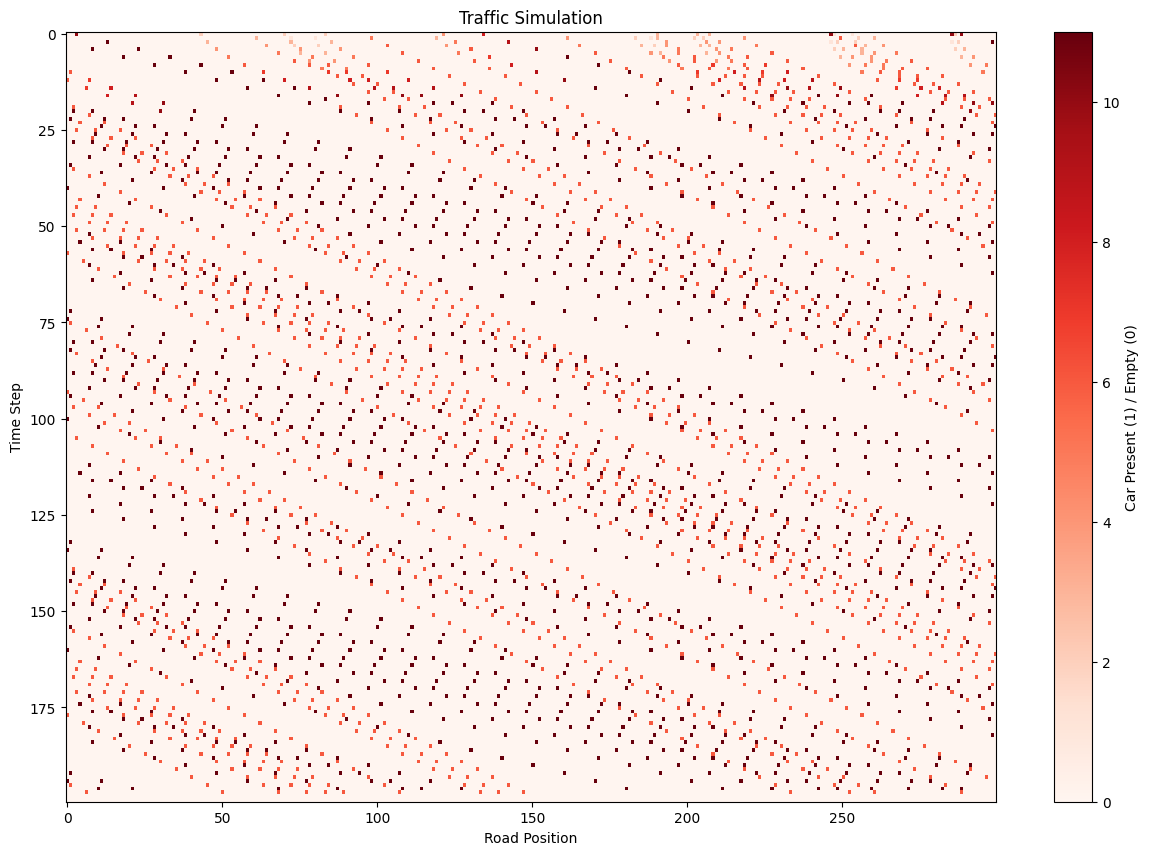

In [49]:
sim10table = np.zeros((200, road_length))
sim10 = TwoLaneTrafficSim(10, 5, road_length, 0.05, 0.05)
sim10.initialize()
sim10table[:, np.newaxis]

sim10table[0] = sim10.positions.T[0] + sim10.velocities.T[0]
sim10table[1] = sim10.positions.T[1] + sim10.velocities.T[1]
for i in range(98):
  sim10.update()
  sim10table[2*i + 2] = sim10.positions.T[0] + sim10.velocities.T[0]

  sim10table[2*i + 3] = sim10.positions.T[1] + sim10.velocities.T[1]

plt.figure(figsize=(15, 10))
plt.imshow(sim10table, cmap='Reds', interpolation='nearest', aspect='auto')
plt.title('Traffic Simulation')
plt.xlabel('Road Position')
plt.ylabel('Time Step')
plt.colorbar(label='velocity + 1')
plt.show()

The graph above is not super useful for visualization, but it is what a two lane simulation would like like over time with low densities

Next I will try to test and verify my implementation, to show that it accurately does what was described in the prompt and in the algorithm I wrote.\\
First is a simulation where one lane begins very dense and the other is sparse with a low max speed. As you can see, the first lane starts with 180 cars the second only 15 cars, but at the end there is only 133 in the first lane and 62 in the second lane. This is because cars in the dense lane will be constantly having to slow down because of cars in front of them and therefore checking to switch lanes and will often be successful because the other lane is not moving as fast. Notably it won't reach 50% capacity in each lane however because drivers are extremely cautious when switching lanes. We should also note that we started and ended with 195 total cars, so no cars were lost in the lane switching process.

180.0
15.0
133.0
62.0


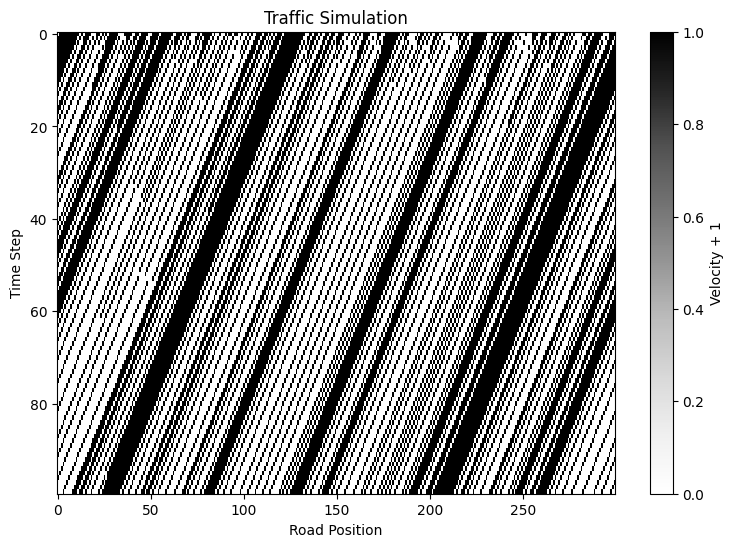

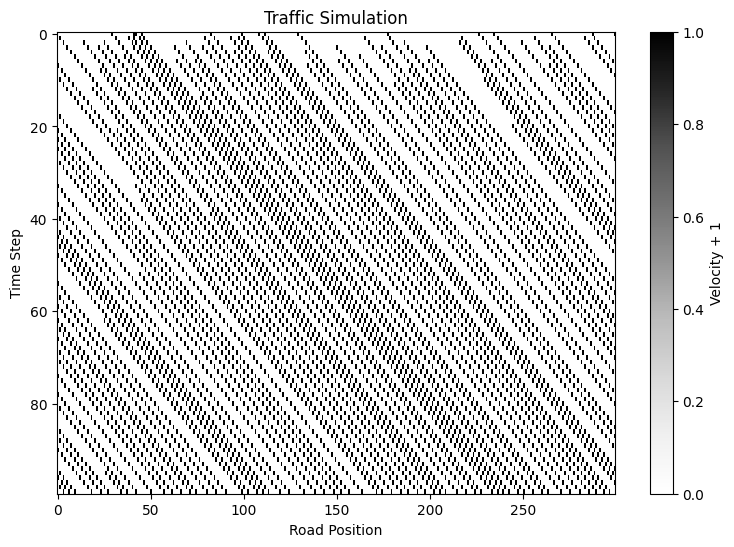

In [57]:
sim10tablel = np.zeros((100, road_length))
sim10tabler = np.zeros((100, road_length))
sim10 = TwoLaneTrafficSim(5, 2, road_length, 0.6, .05)
sim10.initialize()
sim10table[:, np.newaxis]

sim10tablel[0] = sim10.positions.T[0]
sim10tabler[0] = sim10.positions.T[1]
for i in range(99):
  sim10.update()
  sim10tablel[i + 1] = sim10.positions.T[0]
  sim10tabler[i + 1] = sim10.positions.T[1]
print(np.sum(sim10tablel[0], axis = 0))
print(np.sum(sim10tabler[0], axis = 0))
print(np.sum(sim10tablel[99], axis = 0))
print(np.sum(sim10tabler[99], axis = 0))


plt.figure(figsize=(9, 6))
plt.imshow(sim10tablel, cmap='Greys', interpolation='nearest', aspect='auto')
plt.title('Traffic Simulation')
plt.xlabel('Road Position')
plt.ylabel('Time Step')
plt.colorbar(label='Car Present (1) / Empty (0)')
plt.show()

plt.figure(figsize=(9, 6))
plt.imshow(sim10tabler, cmap='Greys', interpolation='nearest', aspect='auto')
plt.title('Traffic Simulation')
plt.xlabel('Road Position')
plt.ylabel('Time Step')
plt.colorbar(label='Car Present (1) / Empty (0)')


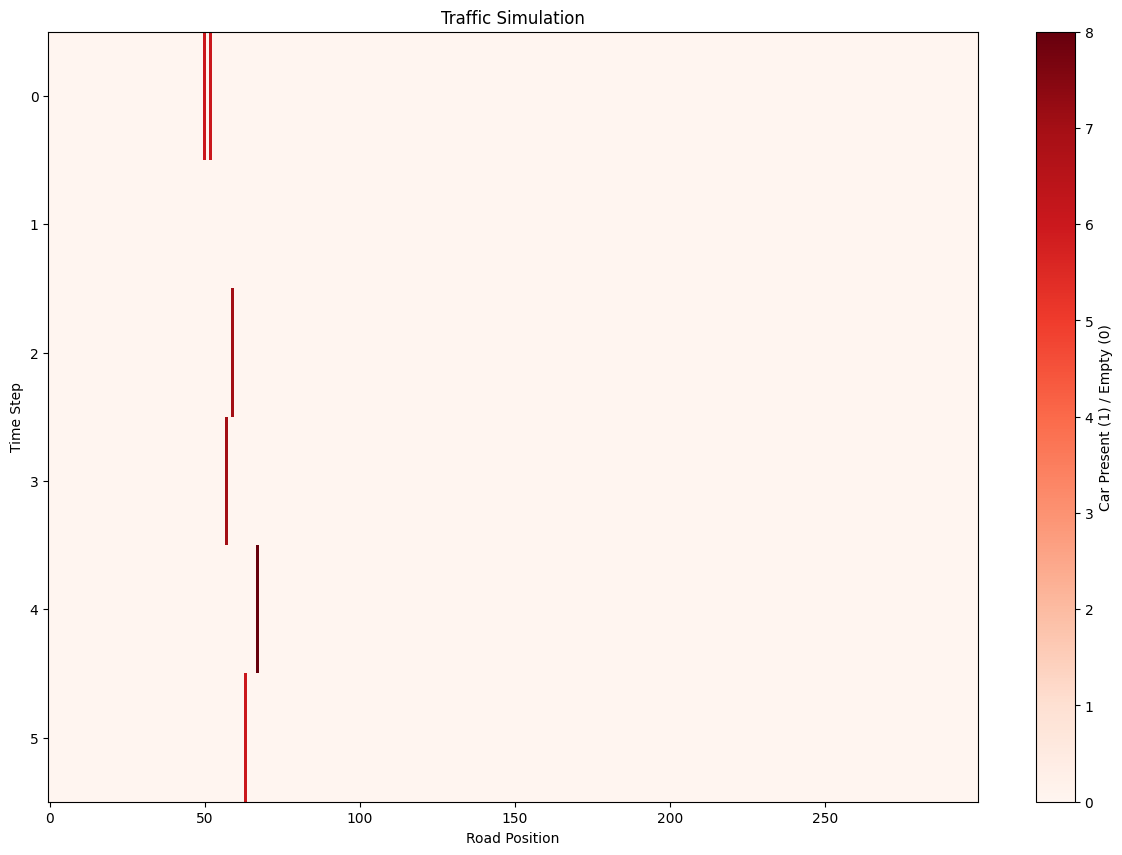

In [43]:
sim10table = np.zeros((6, road_length))
sim10 = TwoLaneTrafficSim(10, 6, road_length, 0.8, 0.01)
l1pos = np.zeros((road_length, ), dtype=int)
l2pos = np.zeros((road_length, ), dtype=int)
l1velo = np.zeros((road_length, ), dtype=int)
l2velo = np.zeros((road_length, ), dtype=int)
l1pos[50] = 1
l1pos[52] = 1
l1velo[50] = 6
l1velo[52] = 6
sim10.setcars(l1pos, l2pos, l1velo, l2velo)
sim10table[:, np.newaxis]

sim10table[0] = sim10.velocities.T[0]
sim10table[1] = sim10.velocities.T[1]
for i in range(2):
  sim10.update()
  sim10table[2*i + 2] = sim10.velocities.T[0]

  sim10table[2*i + 3] = sim10.velocities.T[1]

plt.figure(figsize=(15, 10))
plt.imshow(sim10table, cmap='Reds', interpolation='nearest', aspect='auto')
plt.title('Traffic Simulation')
plt.xlabel('Road Position')
plt.ylabel('Time Step')
plt.colorbar(label='Velocity + 1')
plt.show()

This is a test case for if you are close to the car in front of you and if that car were to switch it would have enough speed to stay in front of you.
As you can see, the car behind successfully switches lanes and maintains speed its speed and once it swaps lanes it continues acceleration.


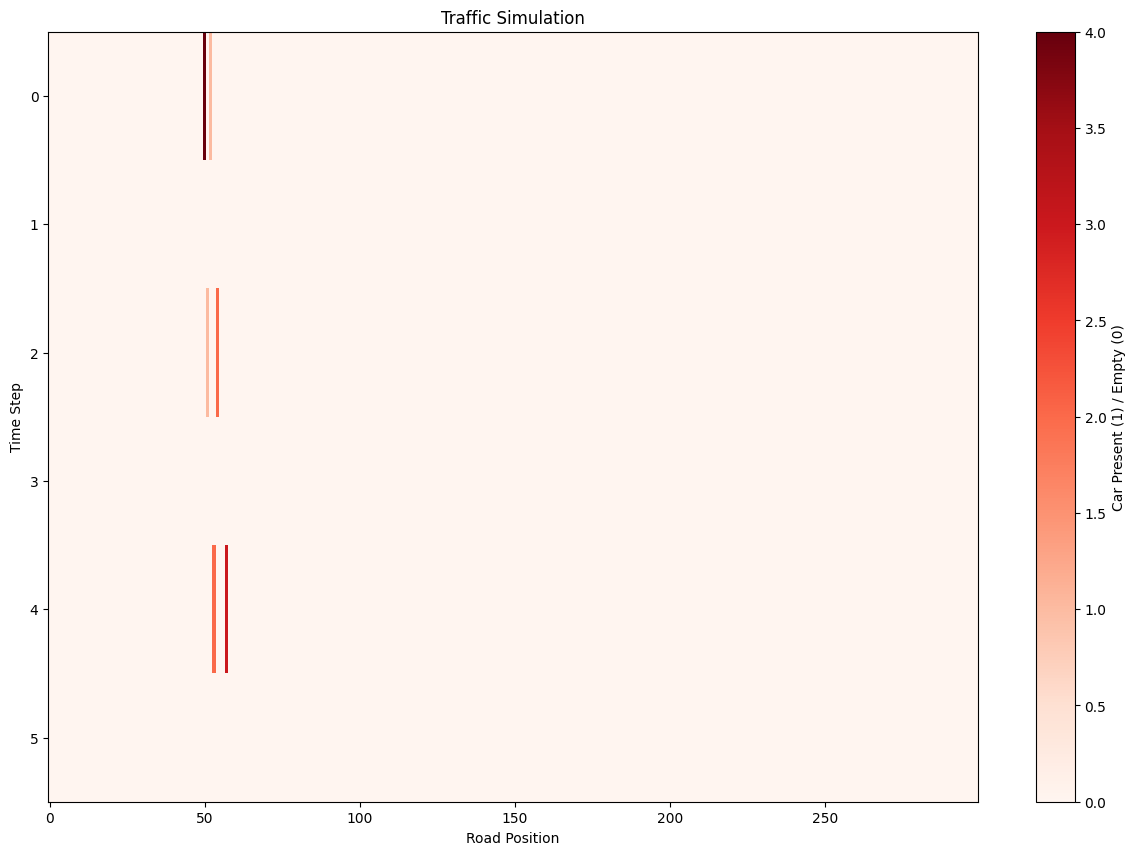

In [44]:
# test car in front is going slow enough that if you switch and they switch you would run into them
# as you can see, you do not switch lanes

sim10table = np.zeros((6, road_length))
sim10 = TwoLaneTrafficSim(6, 6, road_length, 0.8, 0.01)
l1pos = np.zeros((road_length, ), dtype=int)
l2pos = np.zeros((road_length, ), dtype=int)
l1velo = np.zeros((road_length, ), dtype=int)
l2velo = np.zeros((road_length, ), dtype=int)
l1pos[50] = 1
l1pos[52] = 1
l1velo[50] = 4
l1velo[52] = 1
sim10.setcars(l1pos, l2pos, l1velo, l2velo)
sim10table[:, np.newaxis]

sim10table[0] = sim10.velocities.T[0]
sim10table[1] = sim10.velocities.T[1]
for i in range(2):
  sim10.update()
  sim10table[2*i + 2] = sim10.velocities.T[0]

  sim10table[2*i + 3] = sim10.velocities.T[1]

plt.figure(figsize=(15, 10))
plt.imshow(sim10table, cmap='Reds', interpolation='nearest', aspect='auto')
plt.title('Traffic Simulation')
plt.xlabel('Road Position')
plt.ylabel('Time Step')
plt.colorbar(label='Car Present (1) / Empty (0)')
plt.show()


###### check this and. ask

This is a test case for if you are close to the car in front of you and if that car were to switch lanes it would crash into you because your speed is so much higher than its.
As you can see, the car behind does not switch lanes and instead decelerates to be right behind where the front car was previously.  \\
I do want to note that I don't really think this is a necessary check in the code because realistically the car in front would never switch lanes in the first place because it would check if the car behind is going too fast for it to switch which in this case is true, so it wouldn't switch and the car behind would be safe to, but based on the problem statement "and that the closest cars ahead of it may decelerate or change lanes. The driver only changes lanes if there is no possibility of a collision." I believe this is a case we need to check for.

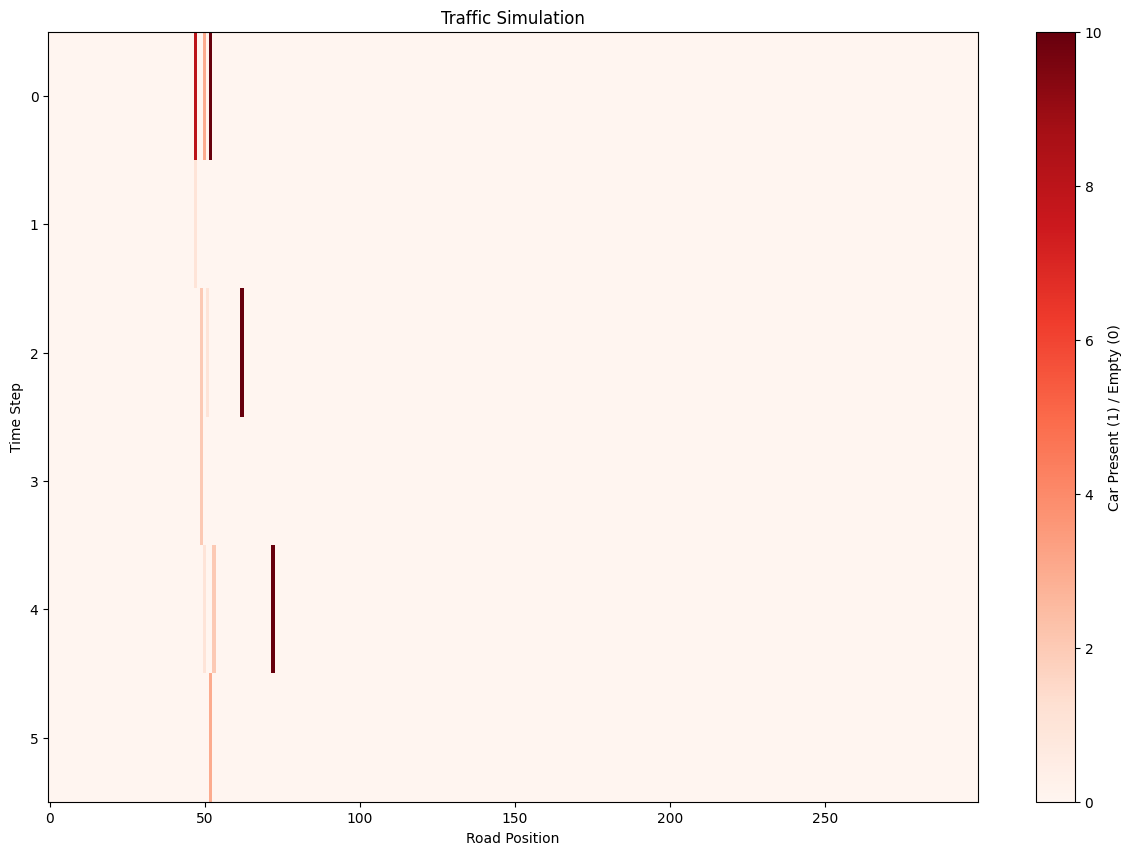

In [45]:
# test switching if close to car in front and the car directly behind is moving much faster
# the car starting at 50, 0 with a speed of 3 would hit the car in front so it tries to switch, however,
# the car behind it is moving fast enough that if it chose to switch lanes they would collide, so we don't switch

sim10table = np.zeros((6, road_length))
sim10 = TwoLaneTrafficSim(10, 6, road_length, 0.8, 0.01)
l1pos = np.zeros((road_length, ), dtype=int)
l2pos = np.zeros((road_length, ), dtype=int)
l1velo = np.zeros((road_length, ), dtype=int)
l2velo = np.zeros((road_length, ), dtype=int)
l1pos[47] = 1
l2pos[47] = 1
l1pos[50] = 1
l1pos[52] = 1

l1velo[47] = 8
l2velo[47] = 1
l1velo[50] = 3
l1velo[52] = 10
sim10.setcars(l1pos, l2pos, l1velo, l2velo)
sim10table[:, np.newaxis]

sim10table[0] = sim10.velocities.T[0]
sim10table[1] = sim10.velocities.T[1]
for i in range(2):
  sim10.update()
  sim10table[2*i + 2] = sim10.velocities.T[0]

  sim10table[2*i + 3] = sim10.velocities.T[1]

plt.figure(figsize=(15, 10))
plt.imshow(sim10table, cmap='Reds', interpolation='nearest', aspect='auto')
plt.title('Traffic Simulation')
plt.xlabel('Road Position')
plt.ylabel('Time Step')
plt.colorbar(label='Car Present (1) / Empty (0)')
plt.show()


This is a test case for if the car directly behind you is moving very fast when you are trying to switch lanes.
As you can see, the car in the middle on the left lane does not switch lanes and instead decelerates to be right behind where the front car was previously because the driver sees the car at index 47 and sees that if it (car index 50) and the car at 47 both switched lanes the car 47 would crash into it.  

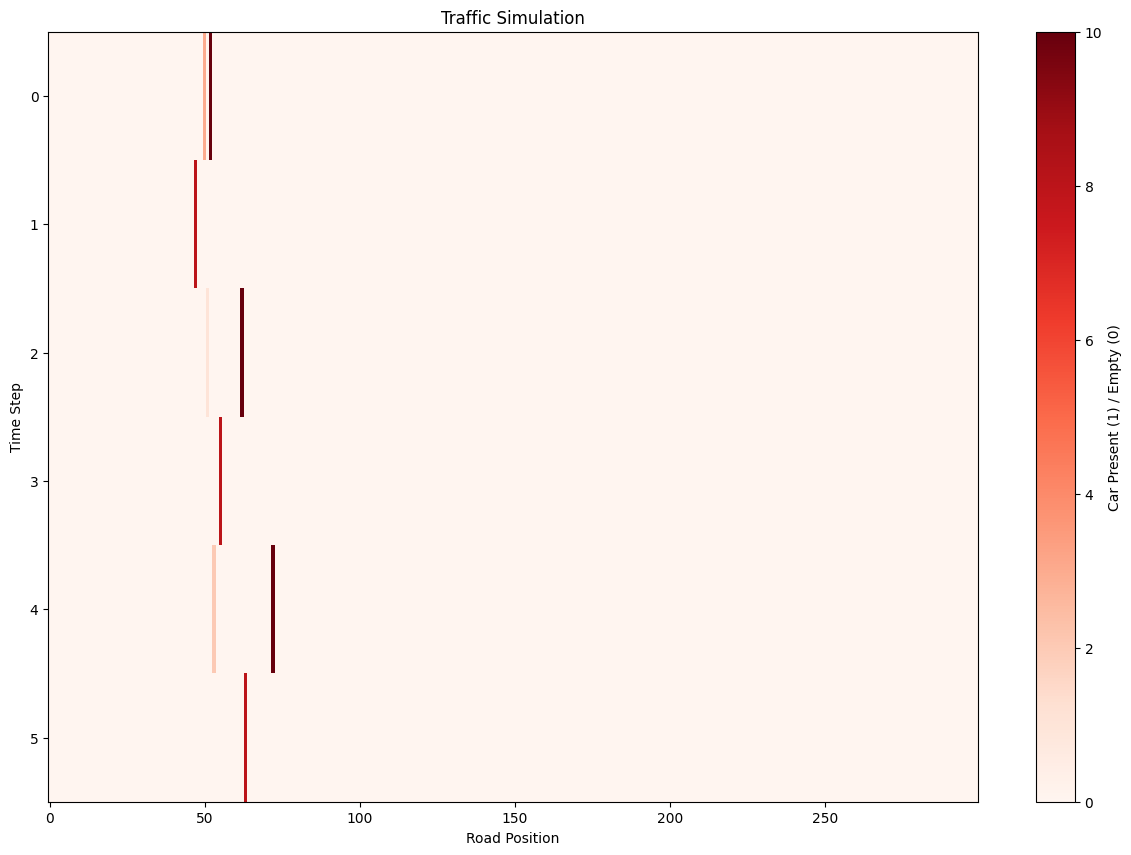

In [46]:
# test switching if close to car in front but the car behind in the other lane is moving fast
# the car starting at 50, 0 with a speed of 3 would hit the car in front so it tries to switch, however,
# the car behind it at 47, 1 is moving fast enough that if the car in lane 0 chose to switch lanes they would collide

sim10table = np.zeros((6, road_length))
sim10 = TwoLaneTrafficSim(10, 8, road_length, 0.8, 0.01)
l1pos = np.zeros((road_length, ), dtype=int)
l2pos = np.zeros((road_length, ), dtype=int)
l1velo = np.zeros((road_length, ), dtype=int)
l2velo = np.zeros((road_length, ), dtype=int)

l2pos[47] = 1
l1pos[50] = 1
l1pos[52] = 1

l2velo[47] = 8
l1velo[50] = 3
l1velo[52] = 10
sim10.setcars(l1pos, l2pos, l1velo, l2velo)
sim10table[:, np.newaxis]

sim10table[0] = sim10.velocities.T[0]
sim10table[1] = sim10.velocities.T[1]
for i in range(2):
  sim10.update()
  sim10table[2*i + 2] = sim10.velocities.T[0]

  sim10table[2*i + 3] = sim10.velocities.T[1]

plt.figure(figsize=(15, 10))
plt.imshow(sim10table, cmap='Reds', interpolation='nearest', aspect='auto')
plt.title('Traffic Simulation')
plt.xlabel('Road Position')
plt.ylabel('Time Step')
plt.colorbar(label='Car Present (1) / Empty (0)')
plt.show()

This is a test case for if the car behind you in the other lane is moving very fast when you are trying to switch lanes.
As you can see, the back car in  the left lane does not switch lanes and instead decelerates to be right behind where the front car was previously because the driver sees the car in the other lane and sees that if it (back car in left lane) and the car in the right lane both switched lanes the car in the right lane would crash into it due to its high speed.  

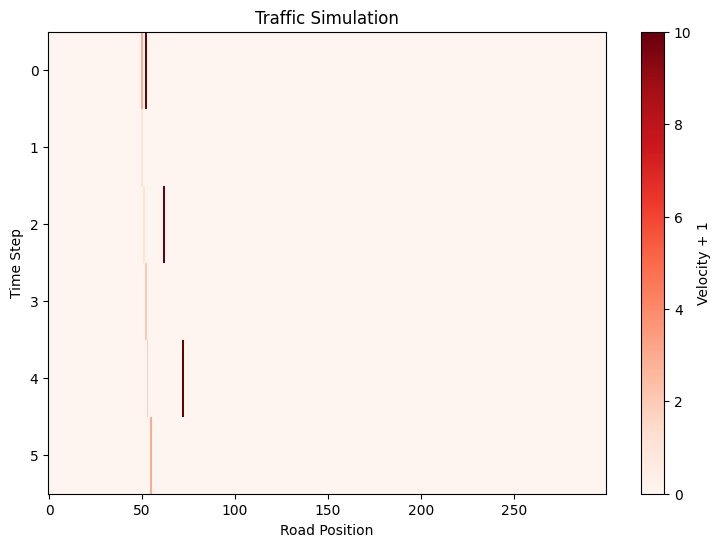

In [60]:
# test car directly next to you dont switch

sim10table = np.zeros((6, road_length))
sim10 = TwoLaneTrafficSim(10, 8, road_length, 0.8, 0.01)
l1pos = np.zeros((road_length, ), dtype=int)
l2pos = np.zeros((road_length, ), dtype=int)
l1velo = np.zeros((road_length, ), dtype=int)
l2velo = np.zeros((road_length, ), dtype=int)

l2pos[50] = 1
l1pos[50] = 1
l1pos[52] = 1

l2velo[50] = 1
l1velo[50] = 3
l1velo[52] = 10
sim10.setcars(l1pos, l2pos, l1velo, l2velo)
sim10table[:, np.newaxis]

sim10table[0] = sim10.velocities.T[0]
sim10table[1] = sim10.velocities.T[1]
for i in range(2):
  sim10.update()
  sim10table[2*i + 2] = sim10.velocities.T[0]

  sim10table[2*i + 3] = sim10.velocities.T[1]

plt.figure(figsize=(9, 6))
plt.imshow(sim10table, cmap='Reds', interpolation='nearest', aspect='auto')
plt.title('Traffic Simulation')
plt.xlabel('Road Position')
plt.ylabel('Time Step')
plt.colorbar(label='Velocity + 1')
plt.show()

This is a test case for if there is a car immediately next to you.
As you can see, you do not switch lanes because that would be a collision as you could not swap lanes and travel your velocity forward without a collision.

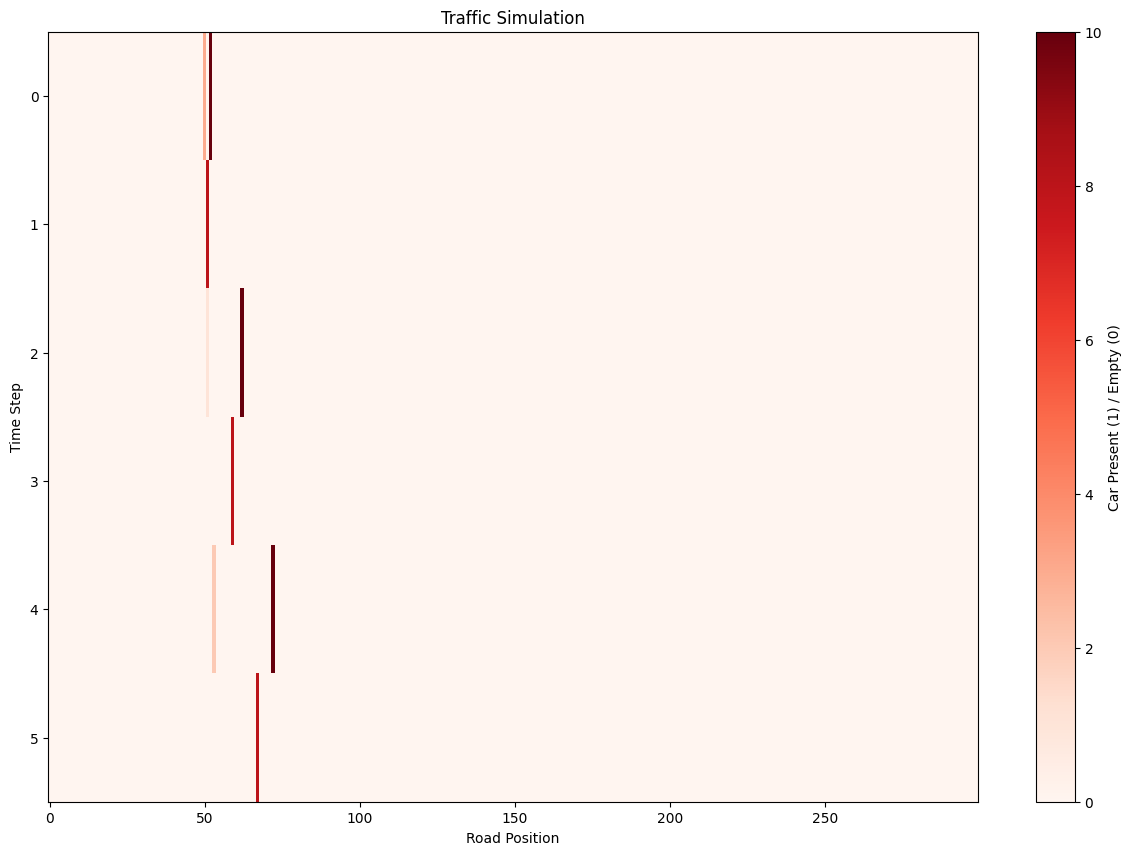

In [48]:
# test should switch if there's a car in the other lane directly in your path
# you dont switch even if theyre going fast because there is a chance they will have to slow down due to a car in front of them you cant see

sim10table = np.zeros((6, road_length))
sim10 = TwoLaneTrafficSim(10, 8, road_length, 0.8, 0.01)
l1pos = np.zeros((road_length, ), dtype=int)
l2pos = np.zeros((road_length, ), dtype=int)
l1velo = np.zeros((road_length, ), dtype=int)
l2velo = np.zeros((road_length, ), dtype=int)

l2pos[51] = 1
l1pos[50] = 1
l1pos[52] = 1

l2velo[51] = 8
l1velo[50] = 3
l1velo[52] = 10
sim10.setcars(l1pos, l2pos, l1velo, l2velo)
sim10table[:, np.newaxis]

sim10table[0] = sim10.velocities.T[0]
sim10table[1] = sim10.velocities.T[1]
for i in range(2):
  sim10.update()
  sim10table[2*i + 2] = sim10.velocities.T[0]

  sim10table[2*i + 3] = sim10.velocities.T[1]

plt.figure(figsize=(15, 10))
plt.imshow(sim10table, cmap='Reds', interpolation='nearest', aspect='auto')
plt.title('Traffic Simulation')
plt.xlabel('Road Position')
plt.ylabel('Time Step')
plt.colorbar(label='Velocity + 1')
plt.show()

This is the final test for if there is a car in the other lane within the range that you would travel at your current velocity.
As you can see, you do not switch lanes because that would be a collision as although they are moving faster than you they could have to decelerate and if you switched lanes and continued at your current speed you would run into them thus making a collision.

Overall, I think my tests show pretty clearly that the cars only switch lanes when there is absolutely no danger of a collision from a fast car behind or a slow car in front and that the vast majority of times they will simply stay in their lane. \\

\\
I'll just make a couple more visuals to look at and experiments

15.0
240.0
37.0
213.0


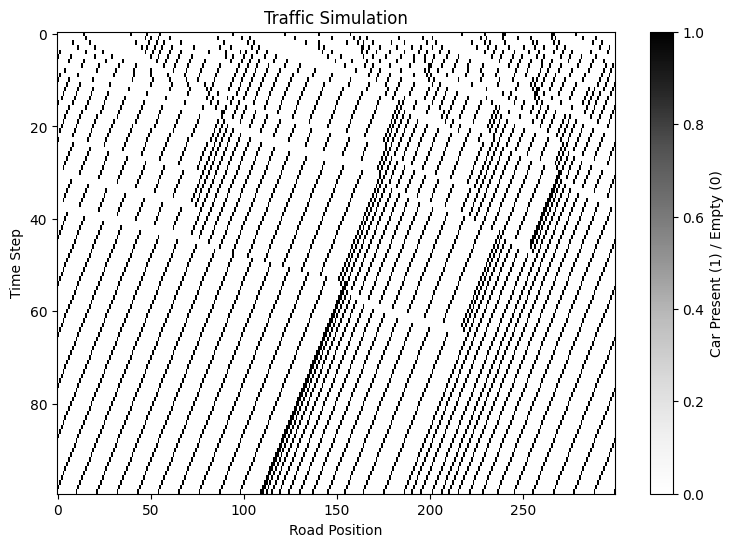

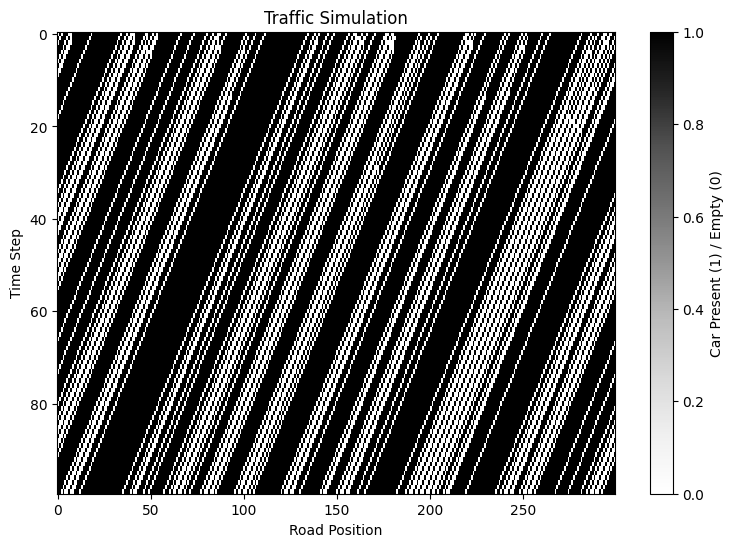

In [61]:
sim10tablel = np.zeros((100, road_length))
sim10tabler = np.zeros((100, road_length))
sim10 = TwoLaneTrafficSim(10, 2, road_length, 0.05, .8)
sim10.initialize()
sim10table[:, np.newaxis]

sim10tablel[0] = sim10.positions.T[0]
sim10tabler[0] = sim10.positions.T[1]
for i in range(99):
  sim10.update()
  sim10tablel[i + 1] = sim10.positions.T[0]
  sim10tabler[i + 1] = sim10.positions.T[1]
print(np.sum(sim10tablel[0], axis = 0))
print(np.sum(sim10tabler[0], axis = 0))
print(np.sum(sim10tablel[99], axis = 0))
print(np.sum(sim10tabler[99], axis = 0))


plt.figure(figsize=(9, 6))
plt.imshow(sim10tablel, cmap='Greys', interpolation='nearest', aspect='auto')
plt.title('Traffic Simulation')
plt.xlabel('Road Position')
plt.ylabel('Time Step')
plt.colorbar(label='Car Present (1) / Empty (0)')
plt.show()

plt.figure(figsize=(9, 6))
plt.imshow(sim10tabler, cmap='Greys', interpolation='nearest', aspect='auto')
plt.title('Traffic Simulation')
plt.xlabel('Road Position')
plt.ylabel('Time Step')
plt.colorbar(label='Car Present (1) / Empty (0)')


Even though the right lane starts extremely dense, the super high max speed of the left lane means that there will almost always be a car that could cause a collision if a right lane car tried to switch lanes meaning the right lane will not swap as much as it logically should.

15.0
240.0
52.0
203.0


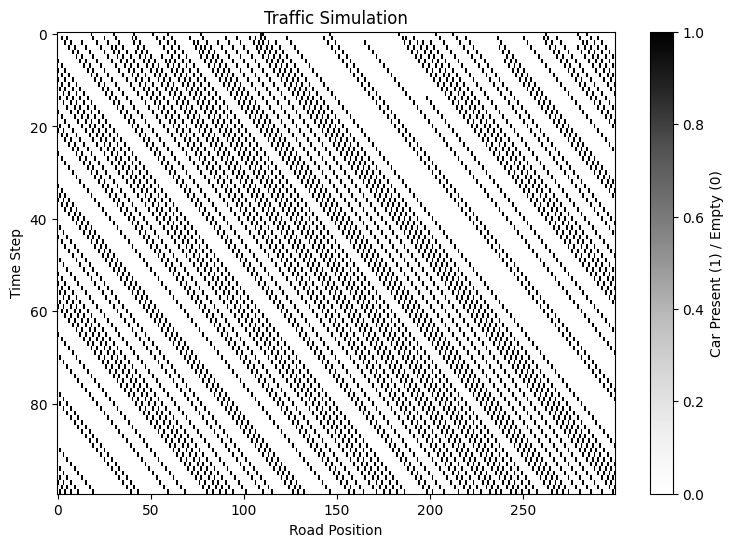

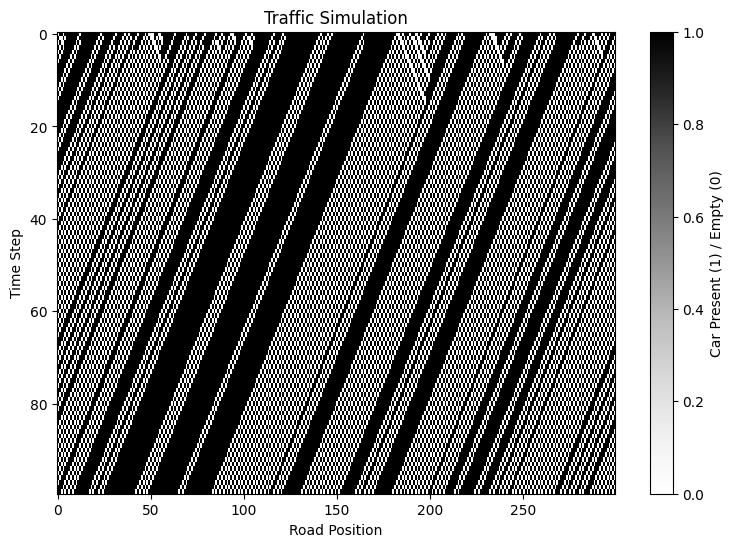

In [64]:
sim10tablel = np.zeros((100, road_length))
sim10tabler = np.zeros((100, road_length))
sim10 = TwoLaneTrafficSim(2, 1, road_length, 0.05, .8)
sim10.initialize()
sim10table[:, np.newaxis]

sim10tablel[0] = sim10.positions.T[0]
sim10tabler[0] = sim10.positions.T[1]
for i in range(99):
  sim10.update()
  sim10tablel[i + 1] = sim10.positions.T[0]
  sim10tabler[i + 1] = sim10.positions.T[1]
print(np.sum(sim10tablel[0], axis = 0))
print(np.sum(sim10tabler[0], axis = 0))
print(np.sum(sim10tablel[99], axis = 0))
print(np.sum(sim10tabler[99], axis = 0))


plt.figure(figsize=(9, 6))
plt.imshow(sim10tablel, cmap='Greys', interpolation='nearest', aspect='auto')
plt.title('Traffic Simulation')
plt.xlabel('Road Position')
plt.ylabel('Time Step')
plt.colorbar(label='Car Present (1) / Empty (0)')
plt.show()

plt.figure(figsize=(9, 6))
plt.imshow(sim10tabler, cmap='Greys', interpolation='nearest', aspect='auto')
plt.title('Traffic Simulation')
plt.xlabel('Road Position')
plt.ylabel('Time Step')
plt.colorbar(label='Car Present (1) / Empty (0)')


By lowering the maximum speeds from the previous simulation we can see that now much more cars from the right lane will switch into the left lane, but still not a ton because when they are all moving slow and densely packed they have to account for the car directly behind accelerating and ahead decelerating so they are too cautious to get into the other lane.

120.0
3.0
83.0
40.0


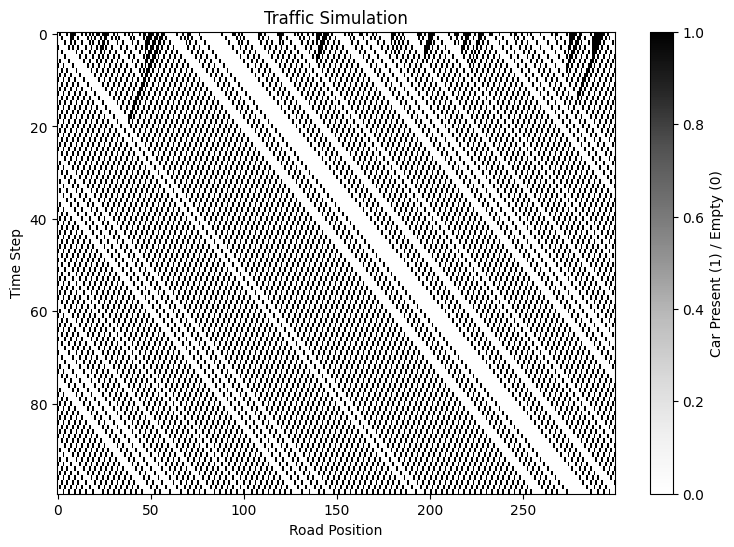

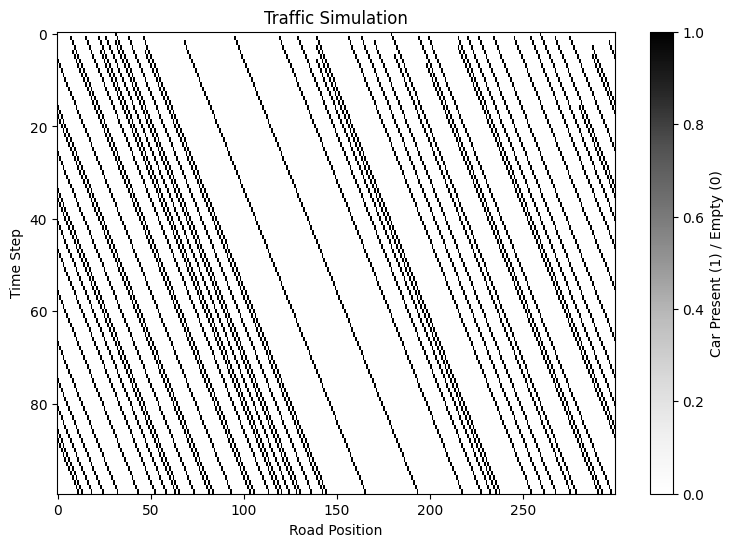

In [70]:
sim10tablel = np.zeros((100, road_length))
sim10tabler = np.zeros((100, road_length))
sim10 = TwoLaneTrafficSim(2, 1, road_length, 0.4, .01)
sim10.initialize()
sim10table[:, np.newaxis]

sim10tablel[0] = sim10.positions.T[0]
sim10tabler[0] = sim10.positions.T[1]
for i in range(99):
  sim10.update()
  sim10tablel[i + 1] = sim10.positions.T[0]
  sim10tabler[i + 1] = sim10.positions.T[1]
print(np.sum(sim10tablel[0], axis = 0))
print(np.sum(sim10tabler[0], axis = 0))
print(np.sum(sim10tablel[99], axis = 0))
print(np.sum(sim10tabler[99], axis = 0))


plt.figure(figsize=(9, 6))
plt.imshow(sim10tablel, cmap='Greys', interpolation='nearest', aspect='auto')
plt.title('Traffic Simulation')
plt.xlabel('Road Position')
plt.ylabel('Time Step')
plt.colorbar(label='Car Present (1) / Empty (0)')
plt.show()

plt.figure(figsize=(9, 6))
plt.imshow(sim10tabler, cmap='Greys', interpolation='nearest', aspect='auto')
plt.title('Traffic Simulation')
plt.xlabel('Road Position')
plt.ylabel('Time Step')
plt.colorbar(label='Car Present (1) / Empty (0)')


Because of how cautious the cars are it is pretty much impossible to have more than a small number switch lanes especially because within their own lane if the density is high enough they will just always be too scared of the car in front and behind to switch even if the other lane is not very populated.

90.0
15.0
55.0
50.0


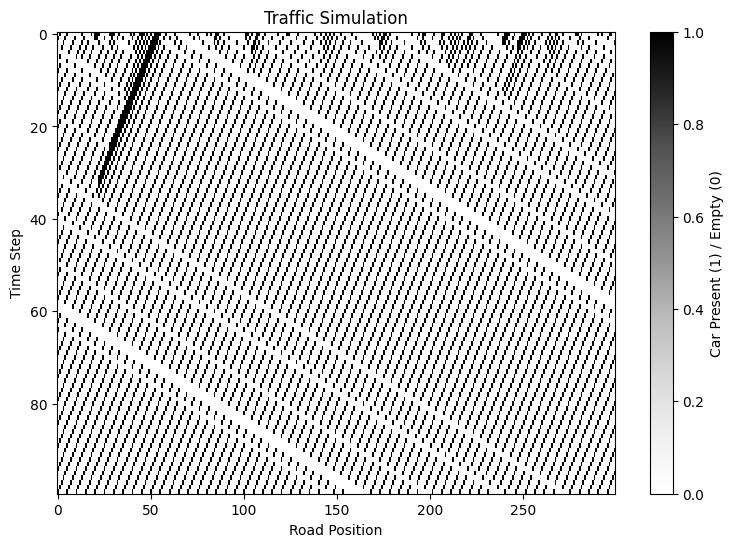

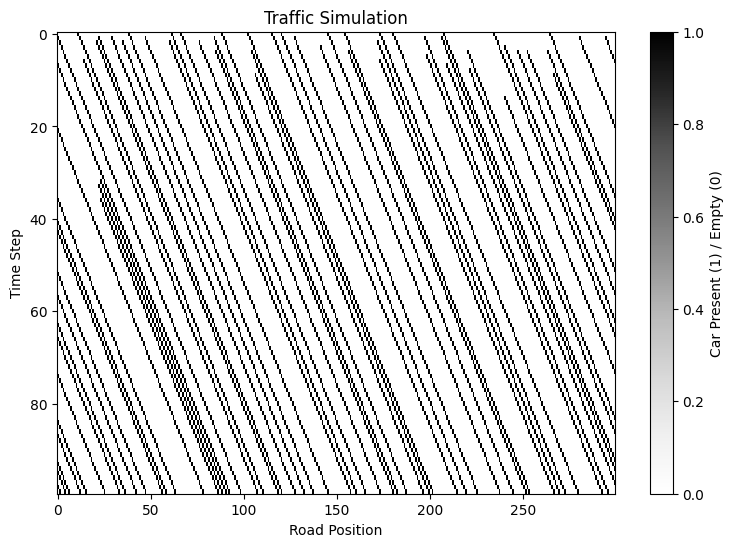

In [74]:
sim10tablel = np.zeros((100, road_length))
sim10tabler = np.zeros((100, road_length))
sim10 = TwoLaneTrafficSim(4, 1, road_length, 0.3, .05)
sim10.initialize()
sim10table[:, np.newaxis]

sim10tablel[0] = sim10.positions.T[0]
sim10tabler[0] = sim10.positions.T[1]
for i in range(99):
  sim10.update()
  sim10tablel[i + 1] = sim10.positions.T[0]
  sim10tabler[i + 1] = sim10.positions.T[1]
print(np.sum(sim10tablel[0], axis = 0))
print(np.sum(sim10tabler[0], axis = 0))
print(np.sum(sim10tablel[99], axis = 0))
print(np.sum(sim10tabler[99], axis = 0))


plt.figure(figsize=(9, 6))
plt.imshow(sim10tablel, cmap='Greys', interpolation='nearest', aspect='auto')
plt.title('Traffic Simulation')
plt.xlabel('Road Position')
plt.ylabel('Time Step')
plt.colorbar(label='Car Present (1) / Empty (0)')
plt.show()

plt.figure(figsize=(9, 6))
plt.imshow(sim10tabler, cmap='Greys', interpolation='nearest', aspect='auto')
plt.title('Traffic Simulation')
plt.xlabel('Road Position')
plt.ylabel('Time Step')
plt.colorbar(label='Car Present (1) / Empty (0)')


This is by far the closest I was able to get to an even split where we end with 55 in lane 1 and 50 in lane 2 by having overall a low density so the left lane cars aren't constantly too scared to switch, but a high enough speed that they will occasionally have incentive to switch by being close to the car in front.

I think these examples at the end do a great job demonstrating how this simulation differs from real life. While cars in the more crowded lanes are somewhat switching, they are so cautious and assume basically the worst case scenario in every instance which causes them to usually stay put. If you were in a gridlock highway in one lane, so many people would be aggressively trying to switch into the more open one because they can also usually tell if the car directly in front or behind is going to try and switch instead of just assuming they will. Also, the code is interesting because each driver is a cautious driver in our case, but they are not assuming that the others are cautious as well: like I mentioned earlier, the car in front of us causing us to slow down would never switch lanes if it would cause a collision with us because it should be a cautious driver as well and would check behind and not switch because it sees us and assumes we could switch lanes causing a collision. Additionally, Task 4 did not require us to implement dallying which would have certainly made it more realistic in a general sense, but when a driver is already as cautious as our drivers are, the possibility of them or the car in front not accelerating would cause even fewer switches. Overall, I think this is a good start to a two lane traffic simulator, but it does lack some of the aggression of real drivers to make lane switches when they probably shouldn't either intentionally or because they just are not cautious, and it lacks the randomness involved in driving down a real highway where people do not accelerate and decelerate perfectly.